# Imports

In [488]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import seaborn as sns
import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LassoCV

import re

# load data

In [586]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
print(df_fw.shape)
df_fw.head()

Dataframe shape:  (52, 15)
(52, 15)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0   22  77.8   175.0        39.0          78       114.0       156.0   
1   21  71.6   179.0        24.0          48        72.0        96.0   
2   19  60.8   165.0        26.0          52        78.0       104.0   
3   21  58.4   172.0        20.0          40        60.0        80.0   
4   20  82.3   185.0        30.0          60        90.0       120.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26  
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27  
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26  
3        90.0       100.0    0.97   0.85   0.68   0.50   0.38    0.26  
4       135.0       150.0    1.02   0.92   0.76   0.50   0.40    0.29

In [93]:
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_sm.head()

Dataframe shape:  (52, 15)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0   22  77.8   175.0        42.0          84       126.0       168.0   
1   21  71.6   179.0        30.0          60        90.0       120.0   
2   19  60.8   165.0        30.0          60        90.0       120.0   
3   21  58.4   172.0        24.0          48        72.0        96.0   
4   20  82.3   185.0        35.0          70       105.0       140.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       189.0       210.0    1.05   0.92   0.72   0.51   0.40    0.28  
1       135.0       150.0    1.06   0.90   0.67   0.50   0.38    0.26  
2       135.0       150.0    1.09   0.92   0.74   0.48   0.36    0.24  
3       108.0       120.0    1.07   0.91   0.73   0.53   0.42    0.27  
4       157.5       175.0    1.03   0.91   0.70   0.51   0.38    0.29

In [3]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

In [6]:
velocity_columns = df_fw.columns[df_fw.columns.str.contains('MV')].to_list()
load_columns = df_fw.columns[df_fw.columns.str.contains('Load')].to_list()
velocity_columns+load_columns

['20% MV',
 '40%MV',
 '60%MV',
 '80%MV',
 '90%MV',
 '100%MV',
 'Load20%1RM',
 'Load40%1RM',
 'Load60%1RM',
 'Load80%1RM',
 'Load90%1RM',
 'Load-1RM-1']

# Archive: Initial EDA

In [20]:
pd.DataFrame(df_fw.loc[0]).transpose()

Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26

## Initial Data visualization (no longer relevant)

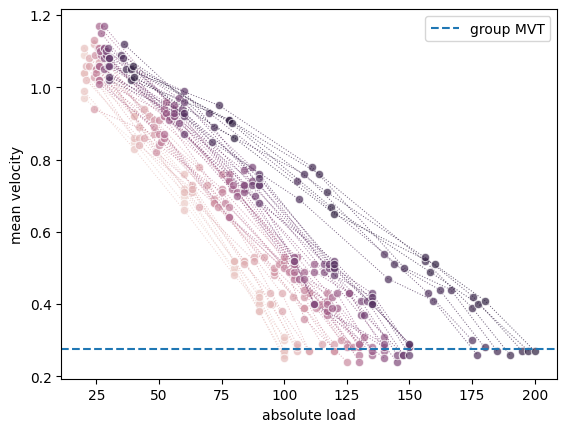

In [595]:
ax = sns.lineplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False,# size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

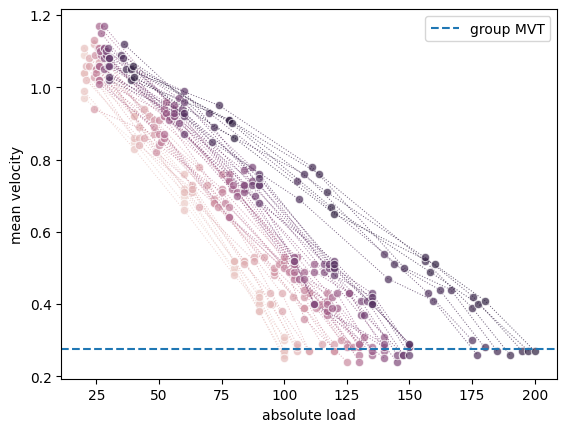

In [ ]:
# Size of marker represents %1RM
ax = sns.lineplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False,# size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

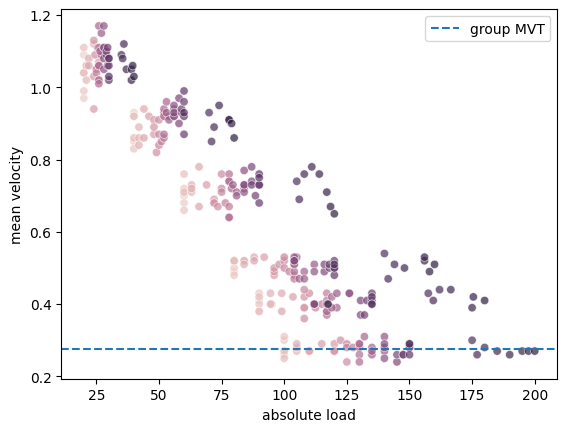

In [57]:

ax = sns.scatterplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,
    legend=False, #size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

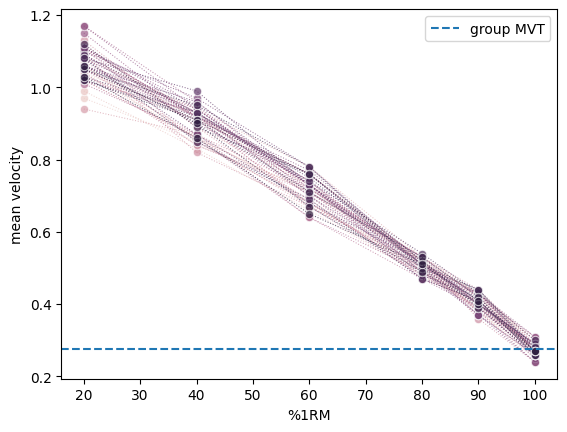

In [56]:
ax = sns.lineplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity',
    alpha=0.7, marker='o', size=0.5,ls=':',
    hue='participant',legend=False
)

ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

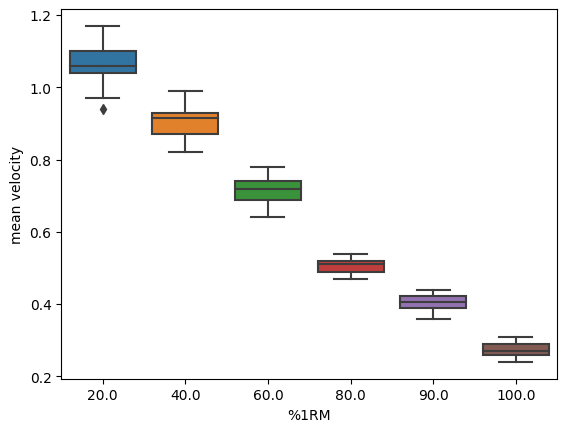

In [13]:
# Same as above but boxplot
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity')

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

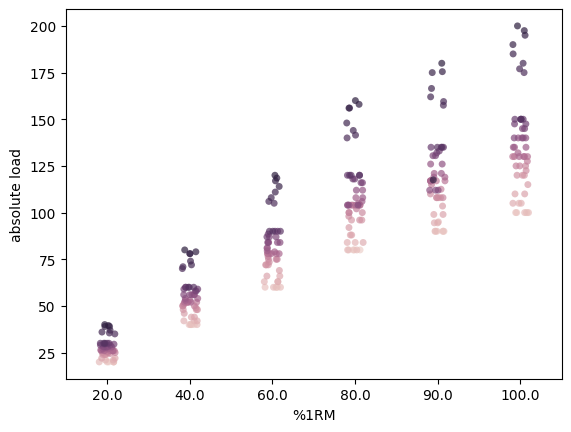

In [14]:
sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load',
    alpha=0.7,
    hue='participant',legend=False
)

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

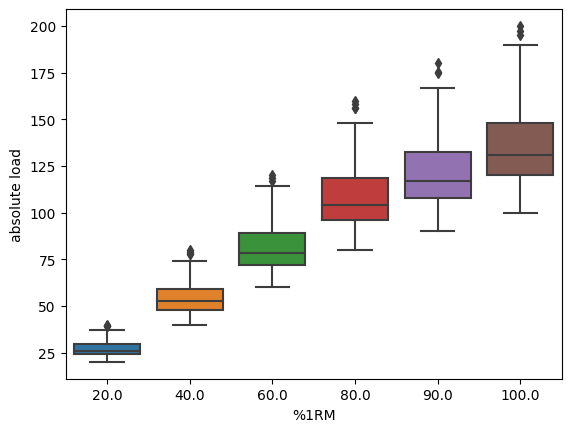

In [15]:
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load')

In [36]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

## Archive: Plot individual load-velocity profiles

In [85]:
# # Create function # 2022-11-26 16:10 No longer relevant
# def reshape_group_df(df):
#     """
#     Reshape dataframe each row represents data from one rep (each participant has multiple columns).
#     Used for data visualization.
#     """
#     # Sort participants by strength
#     df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    
#     velocity_columns = df.columns[df.columns.str.contains('MV')]
#     load_columns = df.columns[df.columns.str.contains('Load')]
#     df = pd.concat([
#         df.melt(
#             value_vars=load_columns, value_name='absolute load',
#             ignore_index=False
#         ),
#         df.melt(
#             id_vars='Load-1RM-1',
#             value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
#             ignore_index=False
#             )
#     ], axis=1).drop(columns='variable')
#     df['%1RM'] = df['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
#     df = df.rename({'Load-1RM-1':'1RM'}, axis=1)

#     df = df.reset_index(names='participant')
#     return df

# # Test the function on first participant's data
# print(df_fw.head(1).filter(regex='Load|MV'))
# reshape_group_df(df_fw.head(1))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  


participant  absolute load    1RM   %1RM  mean velocity
0            0           39.0  190.0   20.0           1.05
1            0           78.0  190.0   40.0           0.91
2            0          114.0  190.0   60.0           0.76
3            0          156.0  190.0   80.0           0.52
4            0          175.0  190.0   90.0           0.39
5            0          190.0  190.0  100.0           0.26

In [63]:
reshaped_df = reshape_group_df(df_fw)
reshaped_df

participant  absolute load    1RM   %1RM  mean velocity
0              0           20.0  100.0   20.0           1.09
1              1           20.0  100.0   20.0           0.97
2              2           20.0  100.0   20.0           1.04
3              3           20.0  100.0   20.0           0.99
4              4           20.0  100.0   20.0           1.11
..           ...            ...    ...    ...            ...
307           47          185.0  185.0  100.0           0.27
308           48          190.0  190.0  100.0           0.26
309           49          195.0  195.0  100.0           0.27
310           50          197.5  197.5  100.0           0.27
311           51          200.0  200.0  100.0           0.27

[312 rows x 5 columns]

In [113]:
# 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles(df, y='mean velocity', x='absolute load', row='participant', 
#     show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):
#         # print(participant)
#         if (show_legend==True):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             # Reverse order of legend entries, then position the legend
#             handles, labels = ax[ax_index].get_legend_handles_labels()
#             ax[ax_index].legend(handles[::-1], labels[::-1])
#             sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [322]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles(df, y='absolute load', x='mean velocity', row='participant', 
    show_legend=False, yaxis_label=None, xticks=None, title=None):

    """
    Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

    Parameters:
    * df: Dataframe.
    * y: Column name with y-axis data.
    * x: Column name with x-axis data.
    * column: Column name of categorical data for creating the different columns in the subplot. 
        Default is Female/Male.
    * row: Column name of categorical data for creating the different rows in the subplot.
    * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
    * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
    * xticks: Ticks of the x-axis. If none, will be set to default.
    * title: Subplot title. If none, will be blank.
    """
    
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for index, participant in enumerate(participants):
        # print(participant)
        if (show_legend==True):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
        ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            # Reverse order of legend entries, then position the legend
            handles, labels = ax[ax_index].get_legend_handles_labels()
            ax[ax_index].legend(handles[::-1], labels[::-1])
            sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

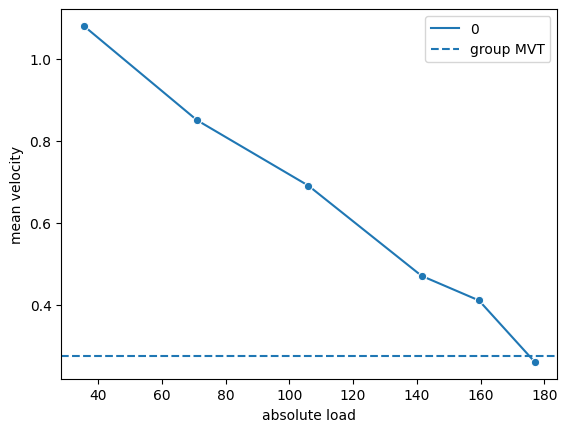

In [73]:
# Plot of mean velocity vs. absolute load
# This represents models 1 and 2
ax = sns.lineplot(data=reshape_group_df(pd.DataFrame(df_fw.loc[51]).transpose()), x='absolute load', y='mean velocity',
hue='participant', marker='o')
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

### Free weight

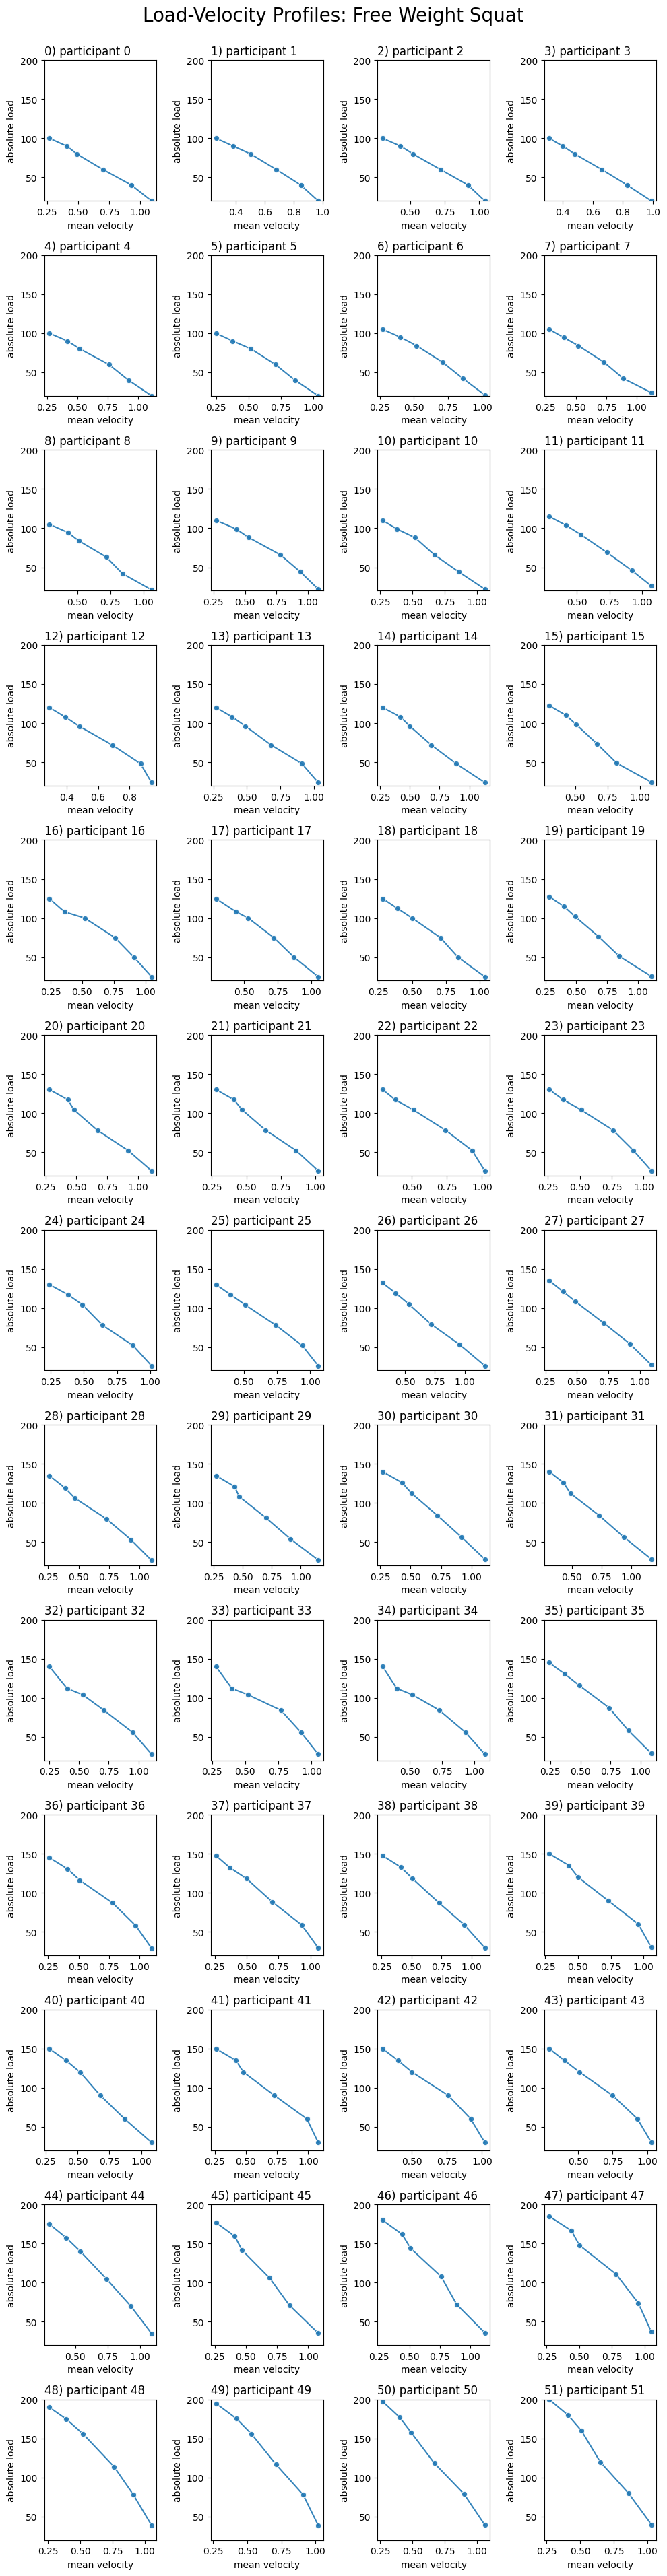

In [587]:
# lv_profiles_fw = plot_profiles(reshape_group_df(df_fw), title='Load-Velocity Profiles: Free Weight Squat')
# lv_profiles_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

### Smith Machine

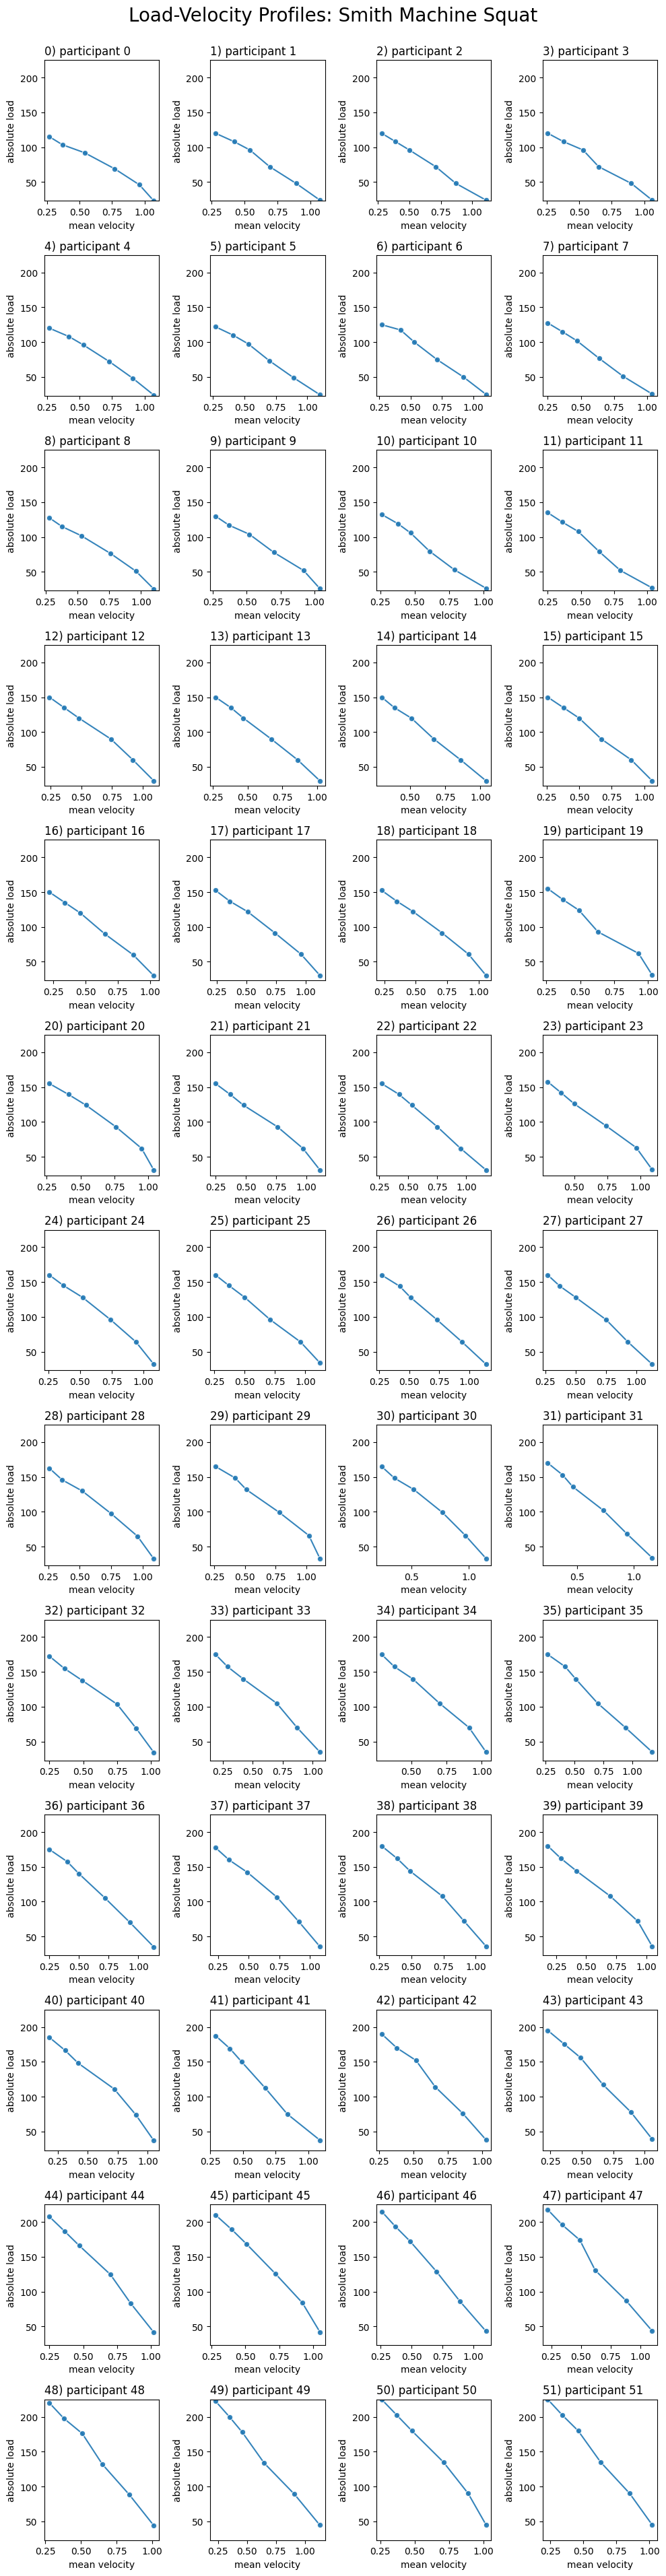

In [326]:
# lv_profiles_sm = plot_profiles(reshape_group_df(df_sm), 
#     title='Load-Velocity Profiles: Smith Machine Squat')
# lv_profiles_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

## Data entry error

In [86]:
reshaped_df[reshaped_df['participant'] == 50]

participant  absolute load    1RM   %1RM  mean velocity
50            50           39.5  197.5   20.0           1.06
102           50           79.0  197.5   40.0           0.90
154           50          118.5  197.5   60.0           0.67
206           50          158.0  197.5   80.0           0.49
258           50          117.5  197.5   90.0           0.40
310           50          197.5  197.5  100.0           0.27

In [89]:
# look for the typo in participant 50's data

for i in [20, 40, 60, 80, 90, 100]:
    print(i/100 * 197.5)

39.5
79.0
118.5
158.0
177.75
197.5


# Feature engineering

## `linear_regression` and `individual_regression` functions

In [640]:
# 2022-11-25 10:38 realize I need to reverse the load and velocity for the calculations
# 2022-11-21 0:53 Allow to be used as a stand-alone function or when called with .apply with transposed df.
def linear_regression(df):
    """
    Calculate slope and intercept using linear regression, where X = load, y = velocity.
    Function called by other functions: individual_regression() and reshape_group_df_lr(df).
    Can be used as a stand-alone function or when called with .apply with transposed DataFrame.

    Parameters:
        df: DataFrame with each row containing data for an individual.
    Returns:
        Dataframe with the slope and intercept for the linear regression.
    
    2022-11-27 20:32
    """
    from sklearn.linear_model import LinearRegression

    if type(df)==pd.Series:
        velocity_columns = df.index[df.index.str.contains('MV')]
        load_columns = df.index[df.index.str.contains('Load')]

        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)
        
        # LinearRegression attributes are in arrays, so need to access values with indices
        df['slope'] = lr.coef_[0][0] 
        df['intercept'] = lr.intercept_[0]

        return df
    else:
        velocity_columns = df.columns[df.columns.str.contains('MV')]
        load_columns = df.columns[df.columns.str.contains('Load')]
        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)

        df_lr = pd.DataFrame()
        df_lr['slope'] = lr.coef_[0]
        df_lr['intercept'] = lr.intercept_

        return df_lr

linear_regression(df_fw.head(1))

slope   intercept
0 -189.397068  248.125765

In [286]:
def individual_regression(df):
    """
    Necessary for feature engineering.
    Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    by calling the linear_regression function.

    Parameters:
        df: DataFrame with each row containing data for an individual.
    Returns:
        Dataframe with new columns added: 
            - 'slope' and 'intercept' for the linear regression for each individual row.
            - 'group MVT': Mean '100%MV' value for the dataset (value identical in each row)
    """
    df_lr = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    
    df_lr['group MVT'] =  df_lr['100%MV'].mean()
    print('Dataframe shape: ', df_lr.transpose().shape)
    return df_lr

individual_regression(df_fw.head(3))

Dataframe shape:  (18, 3)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   
1  21.0  71.6   179.0        24.0        48.0        72.0        96.0   
2  19.0  60.8   165.0        26.0        52.0        78.0       104.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26   
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27   
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26   

      slope  intercept  group MVT  
0 -0.005181   1.297675   0.263333  
1 -0.008061   1.257123   0.263333  
2 -0.007854   1.310351   0.263333

In [ ]:
plot_profiles(reshaped_df[reshaped_df['participant'] >46 ]);

## Engineer features

In [343]:
# individual MVT
df_sm2 = individual_regression(df_sm)
df_sm2.head()



Dataframe shape:  (18, 52)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        42.0        84.0       126.0       168.0   
1  21.0  71.6   179.0        30.0        60.0        90.0       120.0   
2  19.0  60.8   165.0        30.0        60.0        90.0       120.0   
3  21.0  58.4   172.0        24.0        48.0        72.0        96.0   
4  20.0  82.3   185.0        35.0        70.0       105.0       140.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       189.0       210.0    1.05   0.92   0.72   0.51   0.40    0.28   
1       135.0       150.0    1.06   0.90   0.67   0.50   0.38    0.26   
2       135.0       150.0    1.09   0.92   0.74   0.48   0.36    0.24   
3       108.0       120.0    1.07   0.91   0.73   0.53   0.42    0.27   
4       157.5       175.0    1.03   0.91   0.70   0.51   0.38    0.29   

        slope   intercept  group MVT  
0 -213.341118  274.460590   0.255577  
1 -149.626853  191.515539   0.255577  
2 -138.272309  185.763824   0.255577  
3 -121.181946  157.374175   0.255577  
4 -182.018215  229.634930   0.255577

In [596]:
# individual MVT
df_fw2 = individual_regression(df_fw)
df_fw2.head()



Dataframe shape:  (18, 52)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   
1  21.0  71.6   179.0        24.0        48.0        72.0        96.0   
2  19.0  60.8   165.0        26.0        52.0        78.0       104.0   
3  21.0  58.4   172.0        20.0        40.0        60.0        80.0   
4  20.0  82.3   185.0        30.0        60.0        90.0       120.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26   
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27   
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26   
3        90.0       100.0    0.97   0.85   0.68   0.50   0.38    0.26   
4       135.0       150.0    1.02   0.92   0.76   0.50   0.40    0.29   

        slope   intercept  group MVT  
0 -189.397068  248.125765   0.275192  
1 -123.167417  155.390194   0.275192  
2 -125.314695  165.536836   0.275192  
3 -111.189180  132.454769   0.275192  
4 -154.816908  197.872962   0.275192

## Train test split

In [ ]:
# from sklearn.model_selection import train_test_split
# sm_train, sm_test = train_test_split(df_sm2, train_size=.8, random_state=0)

In [835]:
def sorted_test_split(df_fw, df_sm):
    """2022-11-27 20:34
    Sort participants by free weight squat 1RM, then perform train-test split so 
    train and test groups have similar free weight 1RM values.

        Parameters:
            - df_fw: Dataframe containing free weight data set.
            - df_sm: DataFrame containing smith machine data set.
        Returns:
            - fw_train, fw_test, sm_train, sm_test : 4 dataframes containing train and test sets.
        
        Syntax:
        fw_train, fw_test, sm_train, sm_test = sorted_test_split(df_fw, df_sm)
    """
    test_sorted_df_implicit_index = [i for i in range(3,len(df_sm2),5)]
    print(f'Original df shapes: {df_fw.shape}, {df_sm.shape}')
    fw_test = df_fw.sort_values('Load-1RM-1').iloc[test_sorted_df_implicit_index, :]
    test_exp_index = fw_test.index
    train_index = df_fw.index[~df_fw.index.isin(test_exp_index)]
    fw_train = df_fw.loc[train_index, :]
    
    # ensure train-test split has same participants for smith machine data as in free weight data
    sm_test = df_sm.loc[test_exp_index, :] 
    sm_train = df_sm.loc[train_index, :]
    print(f'Test index: {test_exp_index.to_list()}')
    print(f'Train index: {train_index.to_list()}')
    print(f'Train shapes: {fw_train.shape}, {sm_train.shape}')
    print(f'Test shapes: {fw_test.shape}, {sm_test.shape}')
    return fw_train, fw_test, sm_train, sm_test
        
fw_train, fw_test, sm_train, sm_test = sorted_test_split(df_fw2, df_sm2)

Original df shapes: (52, 18), (52, 18)
Test index: [5, 33, 1, 43, 2, 16, 10, 46, 18, 0]
Train index: [3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 51]
Train shapes: (42, 18), (42, 18)
Test shapes: (10, 18), (10, 18)


In [836]:
fw_test

Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
5   20.0  60.1   170.0        20.0        40.0        60.0        80.0   
33  24.0  80.9   184.0        21.0        42.0        63.0        84.0   
1   21.0  71.6   179.0        24.0        48.0        72.0        96.0   
43  21.0  72.8   175.0        25.0        50.0        75.0       100.0   
2   19.0  60.8   165.0        26.0        52.0        78.0       104.0   
16  23.0  61.6   168.0        26.5        53.0        79.5       106.0   
10  21.0  77.3   177.0        28.0        56.0        84.0       104.0   
46  24.0  86.8   187.0        29.5        59.0        87.0       118.0   
18  22.0  78.4   181.0        30.0        60.0        90.0       120.0   
0   22.0  77.8   175.0        39.0        78.0       114.0       156.0   

    Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
5         90.0       100.0    0.99   0.83   0.66   0.48   0.40    0.31   
33        94.5       105.0    1.06   0.84   0.72   0.51   0.43    0.29   
1        108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27   
43       112.5       125.0    1.04   0.84   0.71   0.50   0.39    0.28   
2        117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26   
16       119.0       135.0    1.10   0.93   0.73   0.47   0.39    0.26   
10       112.0       140.0    1.05   0.92   0.77   0.52   0.40    0.28   
46       133.0       147.5    1.11   0.94   0.73   0.51   0.41    0.26   
18       135.0       150.0    1.03   0.93   0.75   0.51   0.40    0.29   
0        175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26   

         slope   intercept  group MVT  
5  -117.100640  136.626558   0.275192  
33 -113.067646  140.801739   0.275192  
1  -123.167417  155.390194   0.275192  
43 -133.262474  164.761150   0.275192  
2  -125.314695  165.536836   0.275192  
16 -125.738566  167.810939   0.275192  
10 -130.388489  172.955108   0.275192  
46 -139.534665  187.759545   0.275192  
18 -153.717800  197.672766   0.275192  
0  -189.397068  248.125765   0.275192

In [1131]:
df_sm.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

## Reshape dataframe, use individual regression to predict

In [335]:
# 2022-11-25 10:51 Realized I need to make load y-variable 
def reshape_group_df_lr(df):
    """2022-11-27 20:39
    Necessary for data visualization.
    Reshape dataframe each row represents data from one rep (each participant has multiple columns).
    Add the estimations from the linear regression.

        Parameters:
        - df: DataFrame with one row per participant. Must contain these columns:
            'Load<number>%1RM'
            'Load-1RM-1', 
            '<number>% MV',
            '100%MV'
        Returns:
        - DataFrame with each row representing a single set (each participant may have multiple rows). 
        Participants are sorted by strength for compatibility with Seaborn plots.
    """
    # Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    # by calling the linear_regression function.
    print('Original shape: ',df.shape)
    df = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    
    velocity_columns = df.columns[df.columns.str.contains('MV')]
    load_columns = df.columns[df.columns.str.contains('Load')]

    # Use intercept and slope to calculate predicted load
    for column in velocity_columns:
        df[re.sub('(\d*%).*','\\1 predicted load', column)] = df['slope'] * df[column] + df['intercept']
    
    prediction_columns = df.columns[df.columns.str.contains('predicted load')].to_list()

    # Sort participants by strength
    df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    df2 = pd.concat([
        df.melt(
            value_vars=load_columns, value_name='absolute load',
            ignore_index=False
        ),
        df.melt(
            id_vars='Load-1RM-1',
            value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
            ignore_index=False
            ),
    ], axis=1).drop(columns='variable')
    df3 = df.melt(
            # id_vars='Load-1RM-1',
            value_vars=prediction_columns, value_name='predicted load', 
            ignore_index=False
            ).reset_index(drop=True).drop(columns='variable')
    df2['%1RM'] = df2['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
    df2 = df2.rename({'Load-1RM-1':'1RM'}, axis=1)
    df2 = df2.reset_index(names='participant')
    df2 = pd.concat([df2,df3],axis=1)
    print('New shape: ', df2.shape)
    return df2


# Test the function on first participant's data
print(df_fw.head(1).filter(regex='Load|MV'))
reshape_group_df_lr(df_fw.head(3))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  
Original shape:  (3, 15)
New shape:  (18, 6)


participant  absolute load    1RM   %1RM  mean velocity  predicted load
0             0           24.0  120.0   20.0           1.03       28.527754
1             1           26.0  130.0   20.0           1.06       32.703260
2             2           39.0  190.0   20.0           1.05       49.258845
3             0           48.0  120.0   40.0           0.91       43.307844
4             1           52.0  130.0   40.0           0.92       50.247317
5             2           78.0  190.0   40.0           0.91       75.774434
6             0           72.0  120.0   60.0           0.68       71.636350
7             1           78.0  130.0   60.0           0.76       70.297668
8             2          114.0  190.0   60.0           0.76      104.183994
9             0           96.0  120.0   80.0           0.49       95.038159
10            1          104.0  130.0   80.0           0.51      101.626342
11            2          156.0  190.0   80.0           0.52      149.639290
12            0          108.0  120.0   90.0           0.39      107.354901
13            1          117.0  130.0   90.0           0.37      119.170399
14            2          175.0  190.0   90.0           0.39      174.260909
15            0          120.0  120.0  100.0           0.27      122.134991
16            1          130.0  130.0  100.0           0.26      132.955015
17            2          190.0  190.0  100.0           0.26      198.882528

# Data visualization

In [236]:
# # 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles_lr(df, y='mean velocity', x='absolute load', row='participant', 
#     y_pred='predicted mean velocity', show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):

#         if (show_legend==True) & (ax_index==0):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         # Plot measured values
#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend, label='measured',
#                 ax = ax[ax_index])
#         # Plot predicted values
#         sns.lineplot(data=df[filter], y=y_pred, 
#             x=x, alpha=0.9, label='regression', ls=':',
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             ax[ax_index].legend()

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [1137]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles_lr(df, y='absolute load', x='mean velocity', row='participant', 
    y_pred='predicted load', show_legend=False, yaxis_label=None, title=None, scale=False):
    """2022-11-27 20:55
    Make a figure containing subplots for each individual participant, where each subplot is the 
    load-velocity profile (load on y-axis, velocity on x-axis) with the linear regression line.

    Parameters:
        * df: Dataframe that is reshaped using the reshape_group_df_lr() function.
        * title (str): Figure title. If none, will be blank.

        Optional:
            * y (str): Column name with y-axis data. Default is 'absolute load'.
            * x (str): Column name with x-axis data. Default is 'mean velocity'.
            * y_pred (str): Column name with the linear regression prediction. Default is 'predicted load'.
            * scale (bool): If True, all y-axes will have the same range.
            * legend (bool): Whether or not to show the legend in the first subplot. Default is False.
    Returns:
        Figure.

    Syntax:
    figure = plot_profiles_lr(reshape_group_df_lr(df), 
        title='Load-Velocity Profiles', show_legend=True)
    """
    
    sns.reset_defaults()    
    %matplotlib inline
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for participant in participants:
        if (show_legend==True) & (ax_index==0):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        # Plot measured values
        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend, label='measured',
                ax = ax[ax_index])
        # Plot predicted values
        sns.lineplot(data=df[filter], y=y_pred, 
            x=x, alpha=0.9, label='regression', ls=':',
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
        if scale==True:
            ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if (legend == 'full'):
            ax[ax_index].legend()

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

## Plot individuals' predicted and measured load velocity profiles 

### Test group only

Original shape:  (10, 15)
New shape:  (60, 6)


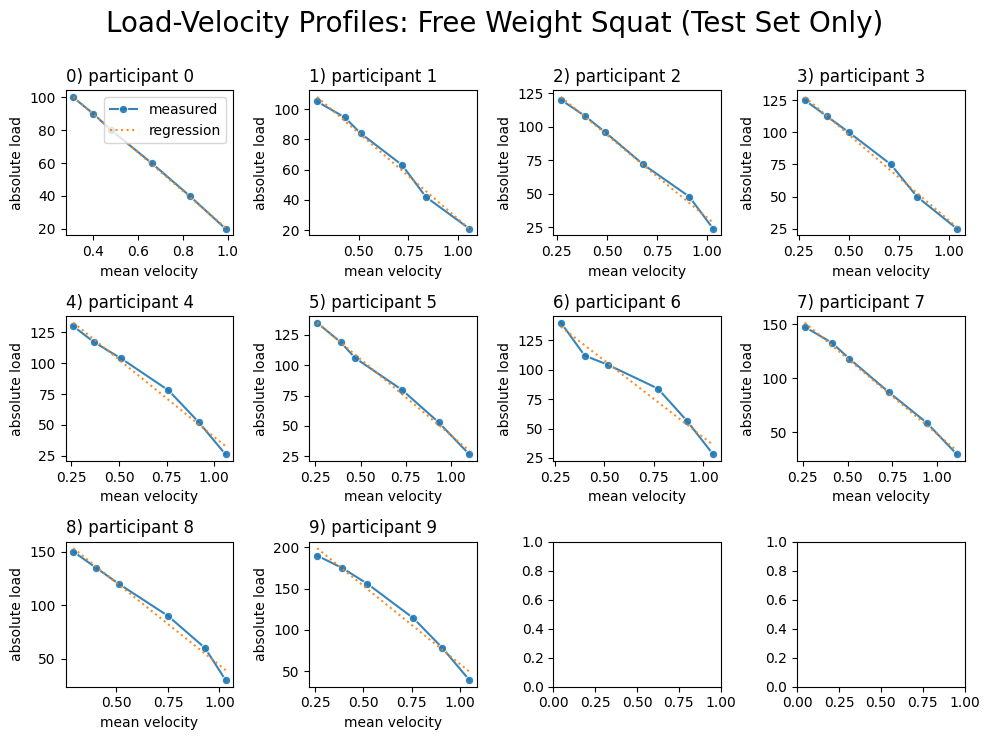

In [1141]:
plot_profiles_lr(reshape_group_df_lr(fw_test[df_fw.columns]), title='Load-Velocity Profiles: Free Weight Squat (Test Set Only)',
show_legend=True).savefig('../output/figures/EDA figures/fw test set lv profiles.png')

Original shape:  (10, 15)
New shape:  (60, 6)


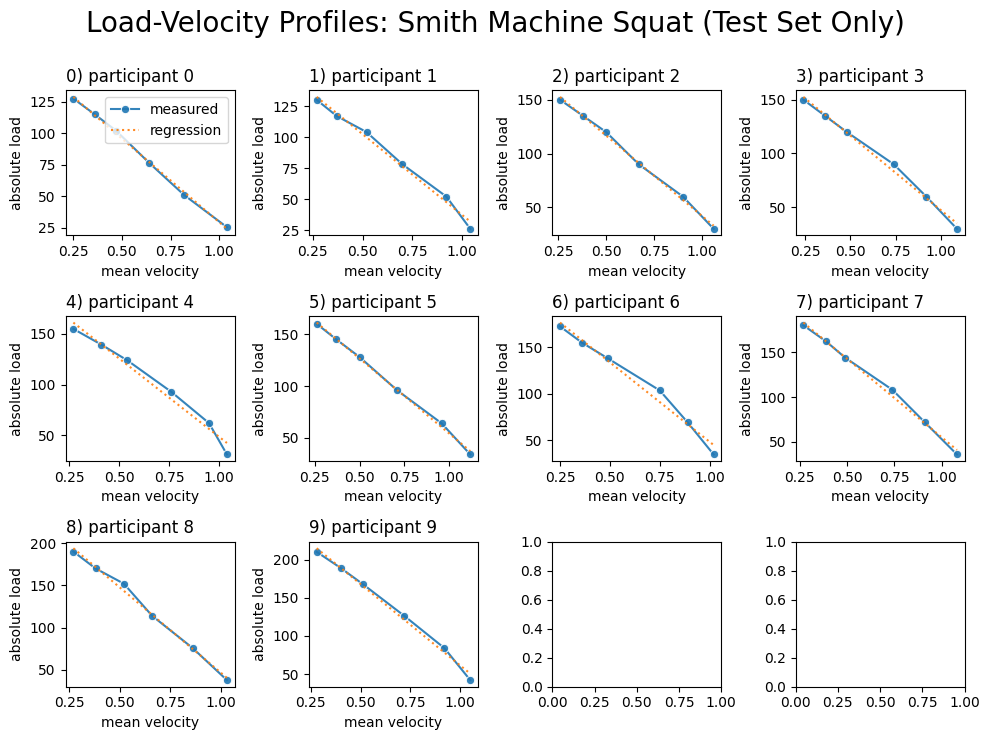

In [1140]:
plot_profiles_lr(reshape_group_df_lr(sm_test[df_sm.columns]), title='Load-Velocity Profiles: Smith Machine Squat (Test Set Only)',
show_legend=True).savefig('../output/figures/EDA figures/sm test set lv profiles.png')

### All participants

In [842]:
df_fw.head(3)

Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0   22  77.8   175.0        39.0          78       114.0       156.0   
1   21  71.6   179.0        24.0          48        72.0        96.0   
2   19  60.8   165.0        26.0          52        78.0       104.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26  
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27  
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26

Original shape:  (52, 15)
New shape:  (312, 6)


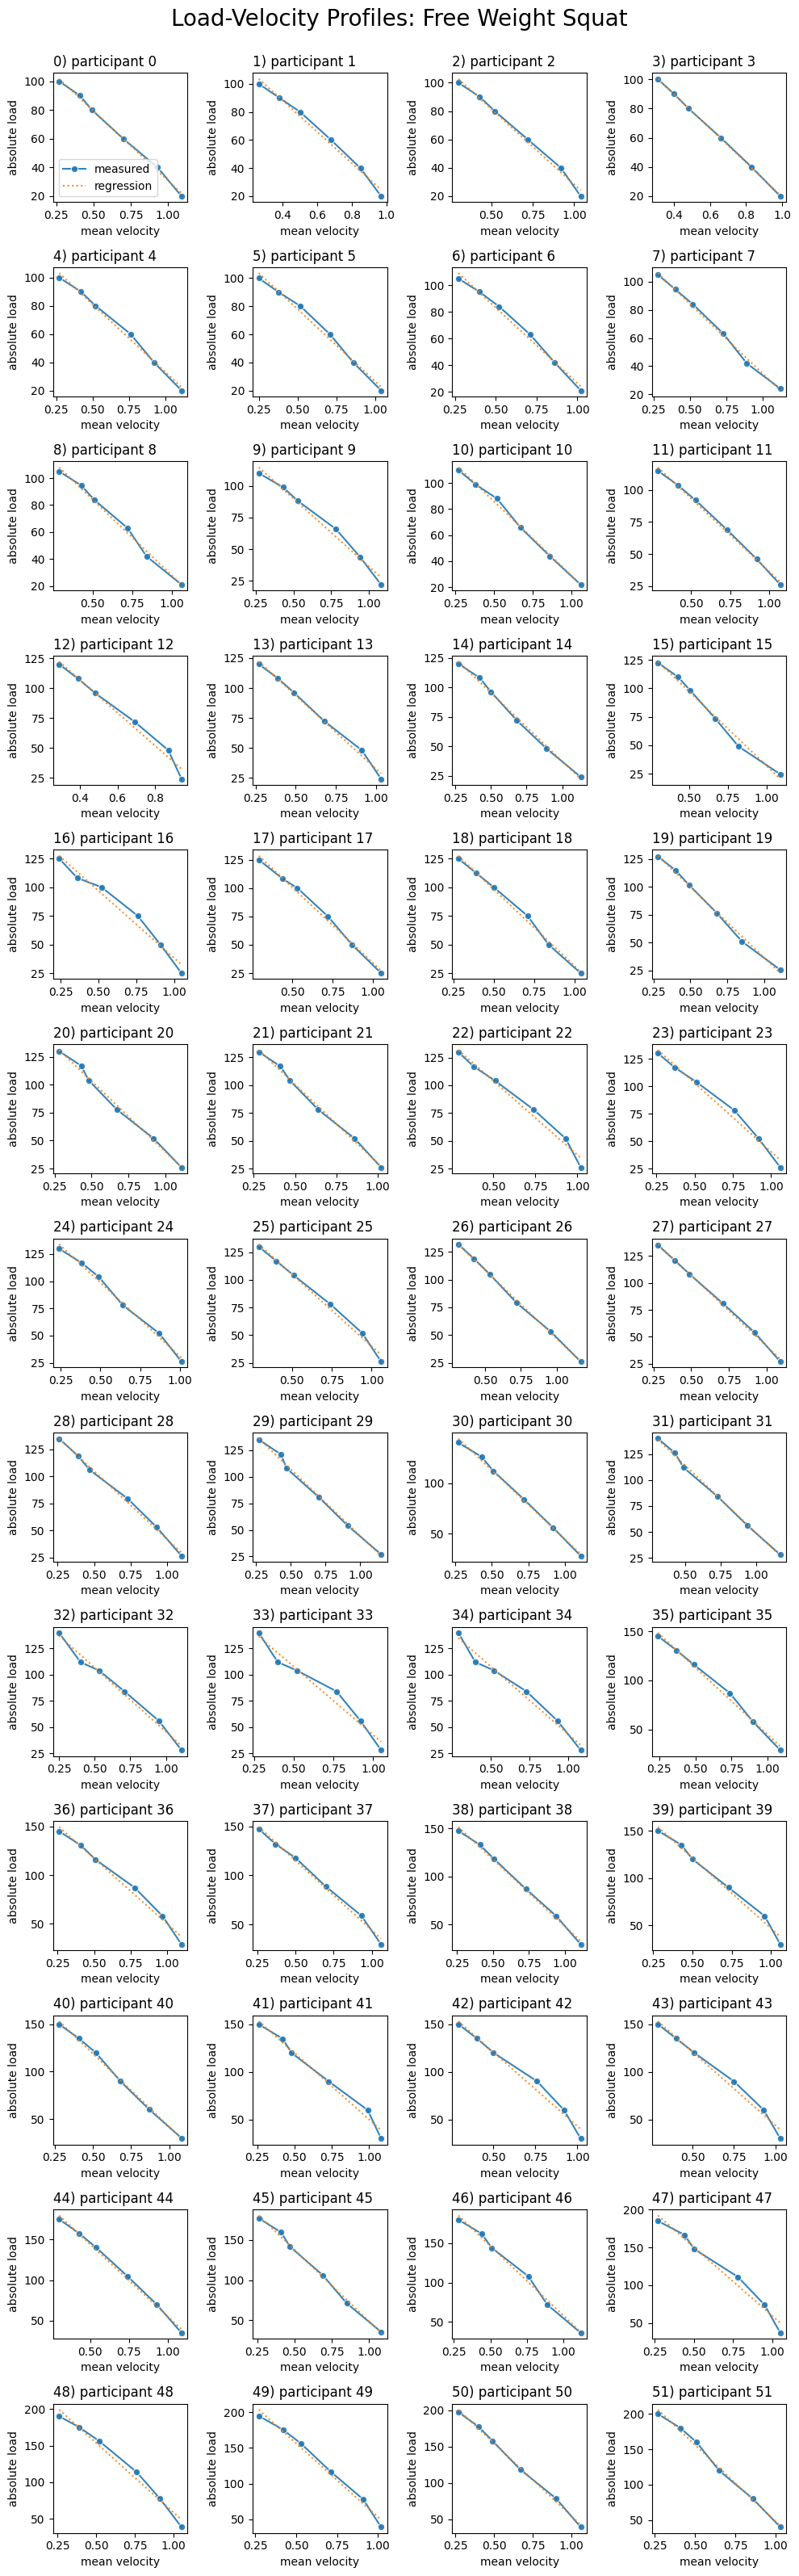

In [641]:
lv_profiles_predictions_fw = plot_profiles_lr(reshape_group_df_lr(df_fw), title='Load-Velocity Profiles: Free Weight Squat',
show_legend=True);

lv_profiles_predictions_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

Original shape:  (52, 15)
New shape:  (312, 6)


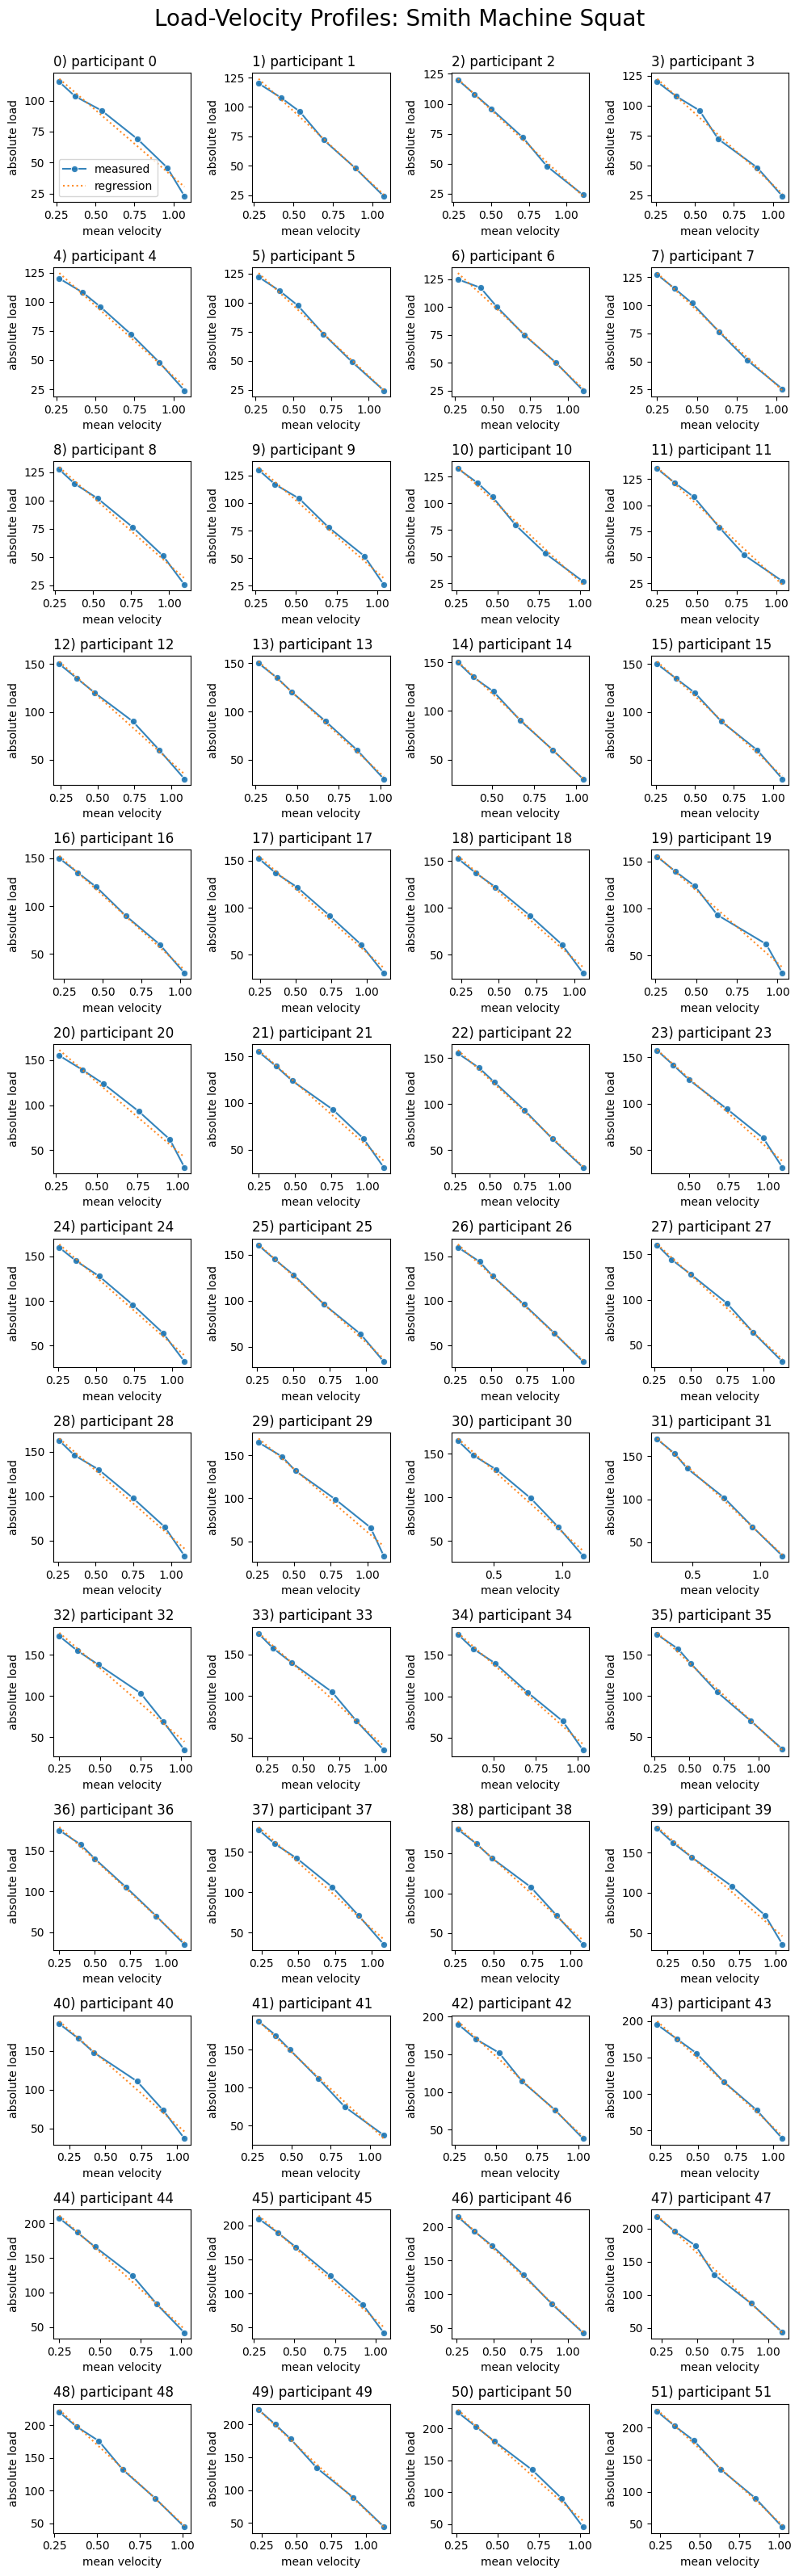

In [342]:
lv_profiles_predictions_sm = plot_profiles_lr(reshape_group_df_lr(df_sm), title='Load-Velocity Profiles: Smith Machine Squat',
show_legend=True, scale=False);

lv_profiles_predictions_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

## Plot variable distributions and correlations

### Free weight

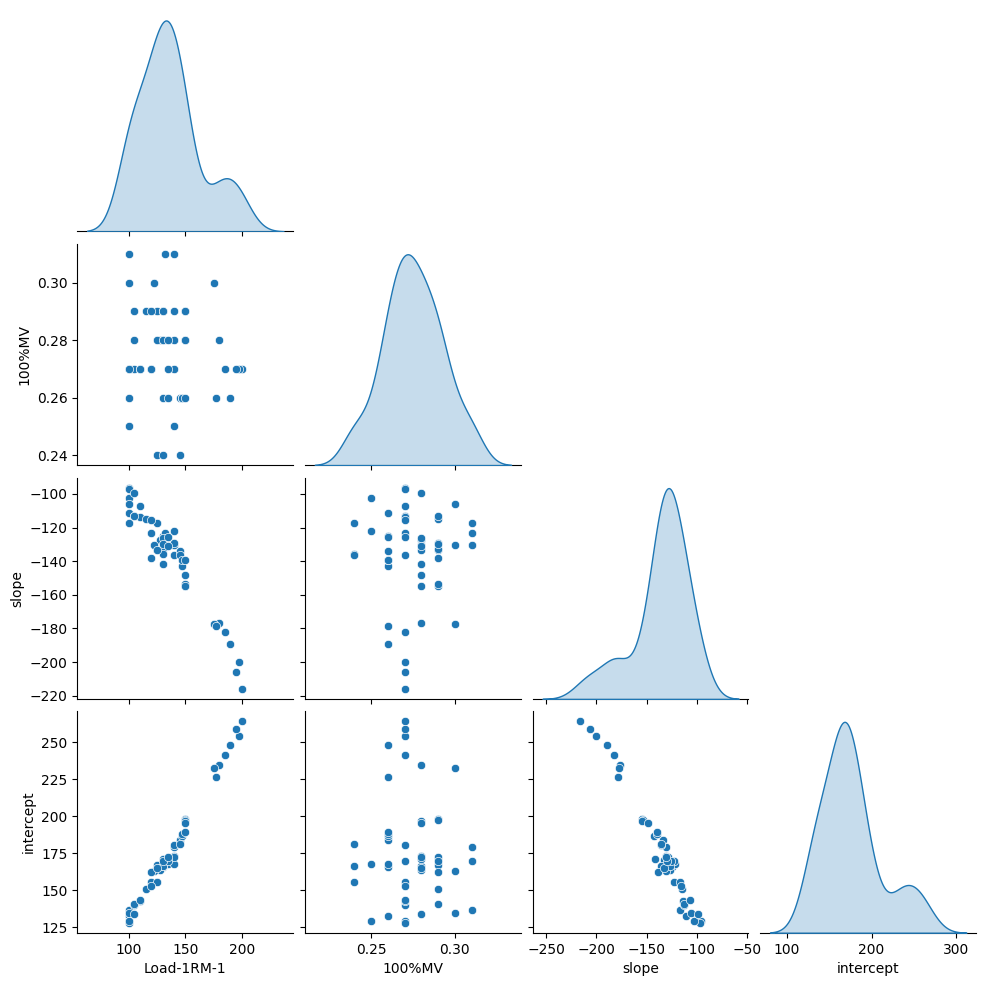

In [642]:
pairplot_fw = sns.pairplot(df_fw2[['Load-1RM-1','100%MV', 'slope', 'intercept']], diag_kind='kde', corner=True)
pairplot_fw.savefig('../output/figures/pairplot_fw.png')

### Smith machine

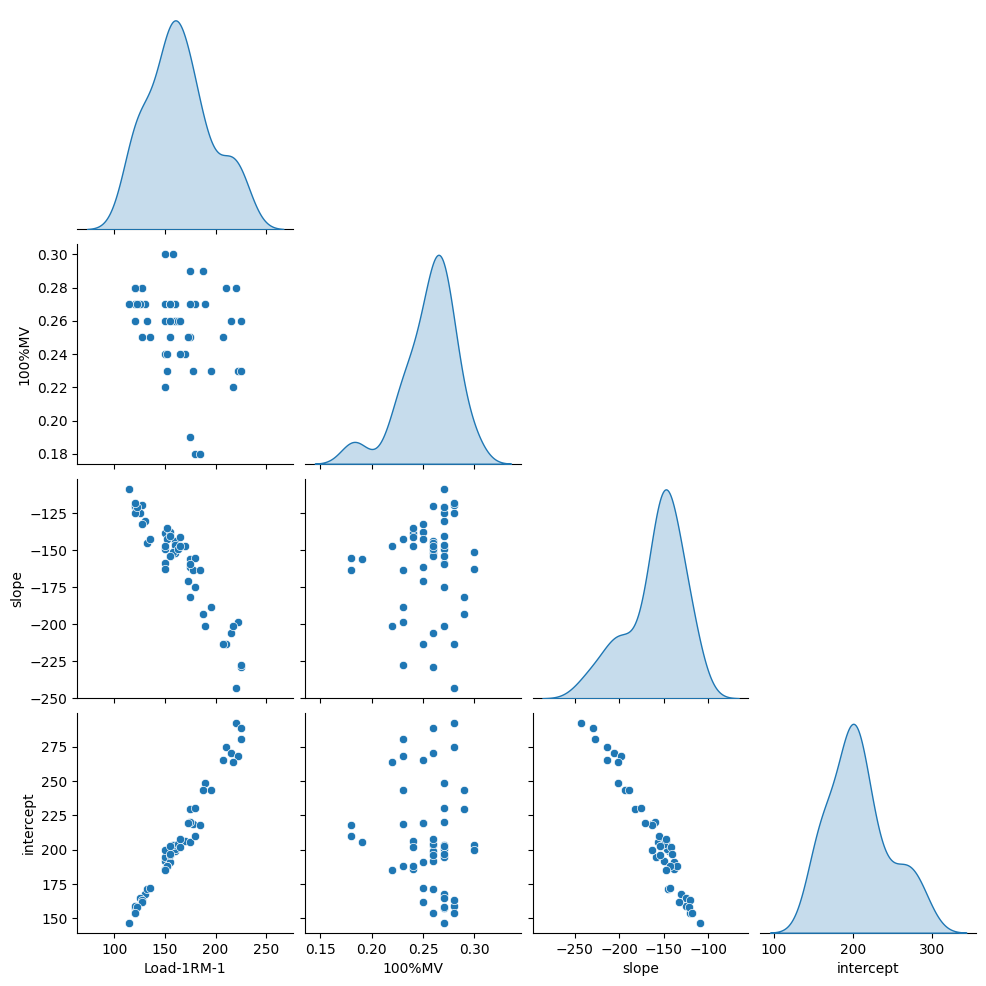

In [512]:
pairplot_sm = sns.pairplot(df_sm2[['Load-1RM-1','100%MV', 'slope', 'intercept']], diag_kind='kde', corner=True)
pairplot_sm.savefig('../output/figures/pairplot_sm.png')

## Plot group data for both exercises

Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)


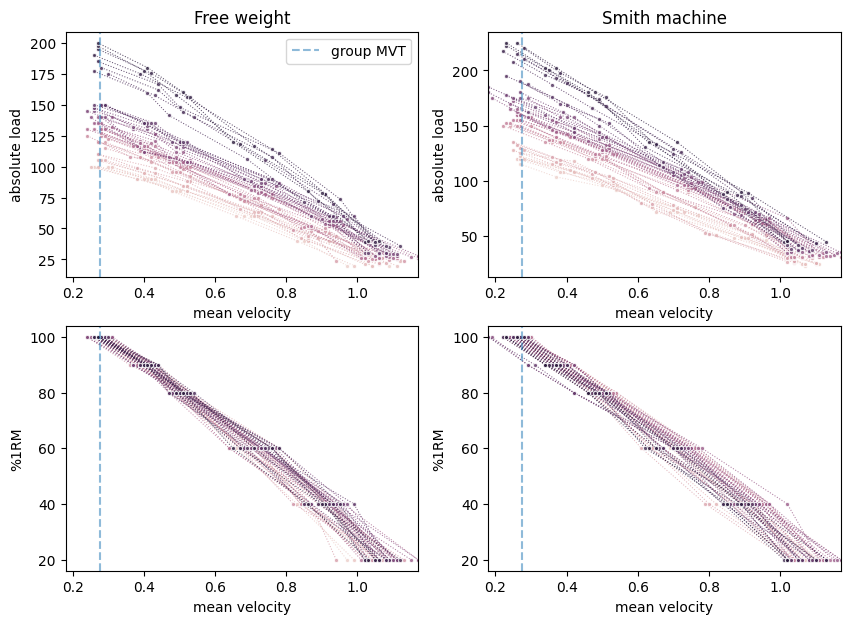

In [1142]:
def data_viz(df_fw, df_sm):
    """2022-11-27 21:21
    Plot data from free weight and Smith machine data sets for all participants along with 
    group minimum velocity threshold (MVT).
    Top row of subplots show load-velocity profiles using absolute load.
    Bottom row of subplots show load-velocity profiles using relative load.
    Requires the custom function reshape_group_df_lr().

    Parameters:
        df_fw, df_sm: Original DataFrames with free weight and Smith machine data, respectively
        (1 participant per row).

    Returns: 
        Figure

    Syntax: 
    data_viz_fig = data_viz(df_fw, df_sm)
    """
    sns.reset_defaults()    
    %matplotlib inline
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
    xmin = pd.concat([df_fw['100%MV'],df_sm['100%MV']], axis=0).min()
    xmax = pd.concat([df_fw['20% MV'],df_sm['20% MV']], axis=0).max()
    # print(xmin, xmax)
    
    for index, df in enumerate([df_fw, df_sm]):
        # absolute load
        sns.lineplot(data=reshape_group_df_lr(df), x='mean velocity', y='absolute load', 
            hue='participant', alpha=.8,marker='.', size=1, ls=':',
            legend=False, ax=ax[0, index]
        ).set_title('Smith machine' if index==1 else 'Free weight')
        ax[0, index].axvline(x=df_fw['100%MV'].mean(),
            label='group MVT',ls='--',alpha=.5)
        ax[0, index].set_xlim([xmin,xmax])

        # relative load
        sns.lineplot(data=reshape_group_df_lr(df), x='mean velocity', y='%1RM', 
            hue='participant', alpha=.8, marker='.', size=1, ls=':',
            legend=False, ax=ax[1, index]
        )
        ax[1, index].axvline(x=df_fw['100%MV'].mean(),
            label='group MVT',ls='--',alpha=.5)
        ax[1, index].set_xlim([xmin,xmax])

    ax[0,0].legend()
    return fig

data_viz_fig = data_viz(df_fw, df_sm)
data_viz_fig.savefig('../output/figures/data_viz.png')

# Modeling Functions

## `evaluate_regression` and `model_data` functions

In [848]:
# Function for model evaluation with train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name='regressor',plot=True):
    """2022-11-27 21:23
    * Print model evalutation metrics: 
        * RMSE
        * Mean absolute error (MAE)
        * Mean error
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
        - y_test, y_pred (array): True and predicted values for test set.
        - y_train, y_pred_train (array): True and predicted values for train set.

        Optional:
        - model_name (str): Name of the model to print and to add to the figure title.
        - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
        - If plot=True, returns a figure of the scatterplot.
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_error = (y_pred-y_test).mean()

    # Metrics for training data

    rmse_train = mean_squared_error(y_train, y_pred_train)
    mean_abs_error_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mean_error_train = (y_pred_train-y_train).mean()
    
    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)
    pearson_train = stats.pearsonr(y_train, y_pred_train)

    print(f'\n{model_name} evaluation metrics: \n\t\tTest data\tTraining data\t\tDifference')
    print(f'RMSE: \t\t\t{rmse:.2f}\t\t{rmse_train:.2f}\t\t{(rmse - rmse_train):.2f}')
    print(f'MAE: \t\t\t{mean_abs_error:.2f}\t\t{mean_abs_error_train:.2f}\t\t{(mean_abs_error - mean_abs_error_train):.2f}')
    print(f'mean error: \t\t{mean_error:.2f}\t\t{mean_error_train:.2f}\t\t{(mean_error-mean_error_train):.2f}')
    print(f'R^2: \t\t\t{r2:.2f}\t\t{r2_train:.2f}\t\t{(r2 - r2_train):.2f}')
    print(f'Pearson r statistic: \t{pearson.statistic:.2f}\t\t{pearson_train.statistic:.2f}\t\t{pearson.statistic-pearson_train.statistic:.2f}')
    print(f'\t\t\tp={pearson.pvalue:.2f}\t\tp={pearson_train.pvalue:.2f}')
    print(f'\npredictions mean: \t{y_pred.mean():.2f}\t\t{y_pred_train.mean():.2f}\t\t{(y_pred.mean() - y_pred_train.mean()):.2f}')
    print(f'predictions std: \t{y_pred.std():.2f}\t\t{y_pred_train.std():.2f}\t\t{(y_pred.std() - y_pred_train.std()):.2f}')
    print(f'\ntarget mean: \t\t{y_test.mean():.2f}\t\t{y_train.mean():.2f}\t\t{y_test.mean()-y_train.mean():.2f}')
    print(f'target std: \t\t{y_test.std():.2f}\t\t{y_train.std():.2f}\t\t{y_test.std()-y_train.std():.2f}')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
        fig.set_title(model_name)
        return fig

In [496]:
# Function to run model and evaluate it # Made for use with train_test_split 
# 2022-11-26 6:24 Update so output is a dictionary or named tuple
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_data(df_train, df_test, x_columns, model, model_name='regressor'):
    """2022-11-27 21:31
    Train and evaluate model using a train-test split.

    Parameters:
        - df_train, df_test: DataFrames with train and test data (1 row per participant).
        - x_columns (list or str): Column names of features to be used for modelling.
        - model: Instance of an estimator.
        - model_name (str, optional): Name of the model for printed results and figure title.

    Returns:
        - y_pred_train, y_pred (array): Model predictions for the train and test sets, respetively.
        - features (dict): Model features and their coefficients.
        - Figure of the scatterplot.

    Syntax:
        y_pred_train, y_pred, features, figure = model_data(df_train, df_test, 
            x_columns=['slope', 'intercept'], model=model, model_name='Model')
    """
    X_train = df_train[x_columns]
    X_test = df_test[x_columns]
    y_train = df_train['Load-1RM-1']
    y_test = df_test['Load-1RM-1']
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name=model_name, plot=True)
    
    print('\nModel feature coefficients')
    features = dict()
    for index, value in enumerate(model.feature_names_in_):
        features['LV '+value] = model.coef_[index]
        print(f'\tLV {value}: {model.coef_[index]}')
    features['model intercept'] = model.intercept_
    print('\tmodel intercept: ', model.intercept_)

    return y_pred_train, y_pred, features, fig


In [ ]:
# # Function to run model and evaluate it # Made for use with train_test_split 2022-11-26 6:24 Update so output is a dictionary or named tuple
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# def model_data(df_train, df_test, x_columns, model, model_name='regressor'):
#     """
#     Model, fit, and evaluate using a train-test split.
#     """
#     X_train = df_train[x_columns]
#     X_test = df_test[x_columns]
#     y_train = df_train['Load-1RM-1']
#     y_test = df_test['Load-1RM-1']
    
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)

#     fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name=model_name, plot=True)

#     features, coefficients, intercept = model.feature_names_in_, model.coef_, model.intercept_
#     lr_attributes = [features, coefficients, intercept]
#     print(f'Model features: {features}')
#     print('Coefficients: ', coefficients)
#     print('Y-intercept: ', intercept)

#     return y_pred_train, y_pred, lr_attributes, fig


In [647]:
# Function for prediction evaluation compared with statistical modelling
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compare_ml_stat(y_test, y_pred, y_pred_stat, model_name='regressor',plot=True):
    """2022-11-27 22:23
    * Print model evalutation metrics for a given model and for the baseline statistical
    regression model (for comparison): 
        * RMSE
        * Mean absolute error (MAE)
        * Mean error
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
        - y_test, y_pred (array): True and predicted values for test set.
        - y_pred_stat (array): Predicted values based on statistical linear regression.

        Optional:
        - model_name (str): Name of the model to print and to add to the figure title.
        - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
        - Figure: Scatterplot of true vs. predicted values.
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_error = (y_pred-y_test).mean()
    
    # Metrics for statistical linear regression
    rmse_stat = mean_squared_error(y_test, y_pred_stat, squared=False)
    mean_abs_error_stat = mean_absolute_error(y_test, y_pred_stat)
    r2_stat = r2_score(y_test, y_pred_stat)
    mean_error_stat = (y_pred_stat-y_test).mean()

    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)
    pearson_stat = stats.pearsonr(y_test, y_pred_stat)
    
    print(f'\n{model_name} evaluation metrics: \n\t\tModel of interest\tBaseline\tDifference')
    print(f'RMSE: \t\t\t{rmse:.2f}\t\t{rmse_stat:.2f}\t\t{(rmse - rmse_stat):.2f}')
    print(f'MAE: \t\t\t{mean_abs_error:.2f}\t\t{mean_abs_error_stat:.2f}\t\t{(mean_abs_error - mean_abs_error_stat):.2f}')
    print(f'mean error: \t\t{mean_error:.2f}\t\t{mean_error_stat:.2f}\t\t{(mean_error-mean_error_stat):.2f}')
    print(f'R^2: \t\t\t{r2:.2f}\t\t{r2_stat:.2f}\t\t{(r2 - r2_stat):.2f}')
    print(f'Pearson r statistic: \t{pearson.statistic:.2f}\t\t{pearson_stat.statistic:.2f}\t\t{pearson.statistic-pearson_stat.statistic:.2f}')
    print(f'\t\t\tp={pearson.pvalue:.2f}\t\tp={pearson_stat.pvalue:.2f}')
    print(f'\npredictions mean: \t{y_pred.mean():.2f}\t\t{y_pred_stat.mean():.2f}\t\t{(y_pred.mean() - y_pred_stat.mean()):.2f}')
    print(f'predictions std: \t{y_pred.std():.2f}\t\t{y_pred_stat.std():.2f}\t\t{(y_pred.std() - y_pred_stat.std()):.2f}')
    print(f'\ntarget mean: {y_test.mean():.2f}')
    print(f'target std: {y_test.std():.2f}')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
        fig.set_title(model_name)
        return fig

## Statistical Modelling Functions

In [ ]:
def stat_modelling(df, model_name='regressor', mvt='individual'):
    """2022-11-27 22:31

    Run statistical modelling using the formula 1RM = (LV_slope) * MVT + LV_intercept.
    Compare results with that obtained from statistical model using individual MVT.

    Parameters:
        - df: DataFrame.
        - model_name (str): Model name to display when printing results and for figure title.
        - mvt (str): {'individual' or 'group'}) Whether to use individual MVT or 
            group mean MVT in the statistical modelling.

    Returns:
        - y_pred (array): Model predictions.
        - Figure: Scatterplot of true vs. predicted values.

    Syntax:
        y_pred, fig = stat_modelling(sm_test, model_name='Statistical linear regression', 
            mvt='individual')
    """ 
    y_pred_stat = df['slope'] * df['100%MV'] + df['intercept']
    if mvt=='individual':
        y_pred = y_pred_stat
    elif mvt=='group':
        y_pred = df['slope'] * df['group MVT'] + df['intercept']
    y_test = df['Load-1RM-1']
    fig = compare_ml_stat(y_test, y_pred, y_pred_stat, model_name=model_name, plot=True)
    return y_pred_stat, fig

In [ ]:
# Function to run model and evaluate it
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_data_vs_stat(df, x_columns, model, model_name='regressor'):
    """
    Model, fit, and evaluate machine learning model compared with statistical linear regression.

    Parameters:
        - df_train: DataFrame with 1 row per participant.
        - x_columns (list or str): Column names of features to be used for modelling.
        - model: Instance of an estimator.
        - model_name (str, optional): Name of the model for printed results and figure title.

    Returns:
        - y_pred (array): Model predictions for the estimator.
        - features (dict): Model features and their coefficients.
        - Figure of the scatterplot.

    Syntax:
        y_pred, figure, features = model_data_vs_stat(df, 
            x_columns=['slope', 'intercept'], model=model, model_name='Model')
    """

    X_test = df[x_columns]
    y_test = df['Load-1RM-1']
    y_pred_stat = df['slope'] * df['100%MV'] + df['intercept']
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    fig = compare_ml_stat(y_test, y_pred, y_pred_stat, model_name=model_name,plot=True)
    print('\nModel feature coefficients')
    features = dict()
    for index, value in enumerate(model.feature_names_in_):
        features['LV '+value] = model.coef_[index]
        print(f'\tLV {value}: {model.coef_[index]}')
    features['model intercept'] = model.intercept_
    print('\tmodel intercept: ', model.intercept_)

    return y_pred, fig, features

# Smith machine

## Model 1


Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.00		3.00		0.00
MAE: 			2.65		2.65		0.00
mean error: 		2.65		2.65		0.00
R^2: 			0.99		0.99		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	166.87		166.87		0.00
predictions std: 	30.84		30.84		0.00

target mean: 164.22
target std: 30.73


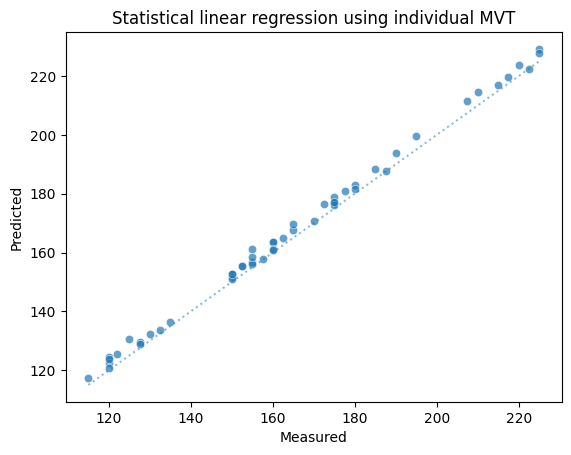

In [902]:
y_pred_stat, eval_statmodel1_fig = stat_modelling(df_sm2, model_name='Statistical linear regression using individual MVT');
eval_statmodel1_fig.figure.savefig('../output/figures/individual model figures/sm_model1.png')

## Model 2


Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			5.22		3.00		2.22
MAE: 			4.41		2.65		1.75
mean error: 		2.58		2.65		-0.06
R^2: 			0.97		0.99		-0.02
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	166.81		166.87		-0.06
predictions std: 	30.09		30.84		-0.74

target mean: 164.22
target std: 30.73


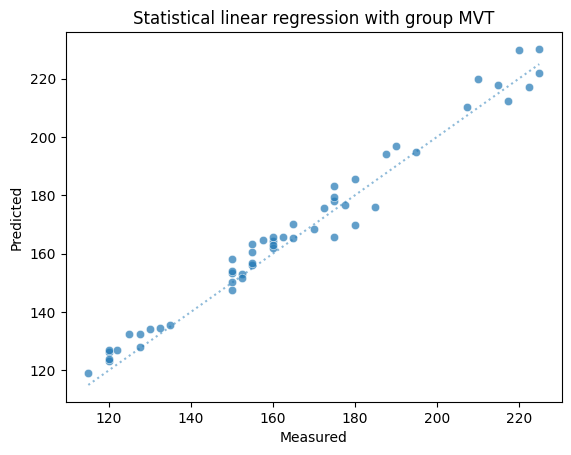

In [662]:
y_pred_stat2, eval_statmodel2_fig = stat_modelling(df_sm2, model_name='Statistical linear regression with group MVT', mvt='group');
eval_statmodel2_fig.figure.savefig('../output/figures/individual model figures/sm_model2.png')

## Model 3


Smith machine: OLS linear Regression evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.41		3.00		1.41
MAE: 			3.42		2.65		0.76
mean error: 		-0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.11		30.84		-0.73

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.40214168797262795
	LV intercept: 1.1251217346212063
	model intercept:  -5.241220036533235


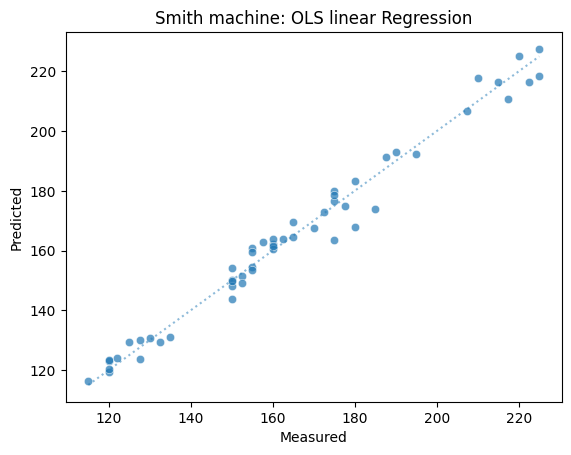

In [656]:
model3 = LinearRegression()
y_pred3, eval_fig3, model3_attributes =  model_data_vs_stat(df_sm2, ['slope', 'intercept'], model3, 
    model_name='Smith machine: OLS linear Regression')
eval_fig3.figure.savefig('../output/figures/individual model figures/sm_model3.png')

In [1144]:
model3_attributes

{'LV slope': 0.40214168797262795,
 'LV intercept': 1.1251217346212063,
 'model intercept': -5.241220036533235}

## Model 1 and 2 features with machine learning


Smith Machine: OLS linear regression including individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			1.53		3.00		-1.47
MAE: 			1.26		2.65		-1.39
mean error: 		-0.00		2.65		-2.65
R^2: 			1.00		0.99		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.39		30.84		-0.45

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.26634714971561224
	LV intercept: 0.9998028152123917
	LV 100%MV: -165.44361793353607
	model intercept:  41.45242871849918


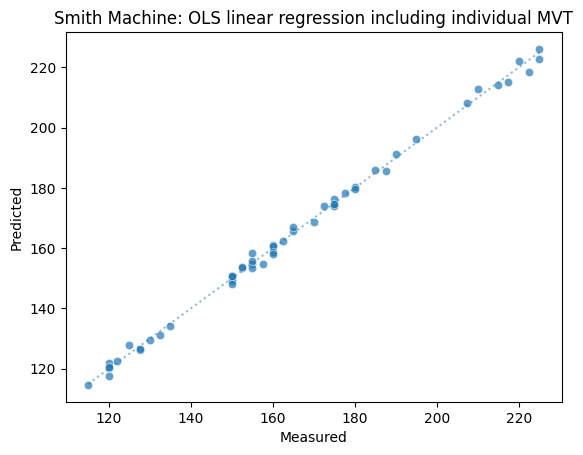

In [657]:
model1_ml = LinearRegression()
y_pred1_ml, eval_fig1_ml, model1_ml_attributes = model_data_vs_stat(df_sm2, x_columns=['slope', 'intercept', '100%MV'], 
    model=model1_ml, model_name='Smith Machine: OLS linear regression including individual MVT')
eval_fig1_ml.figure.savefig('../output/figures/individual model figures/sm_model1_ml.png')
# Using individual MVT improves predictinos compared to without on training test set


Smith machine: OLS linear regression including group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.41		3.00		1.41
MAE: 			3.42		2.65		0.76
mean error: 		0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.11		30.84		-0.73

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.40214168797262845
	LV intercept: 1.1251217346212063
	LV group MVT: 6.313246033743667e-34
	model intercept:  -5.24122003653315


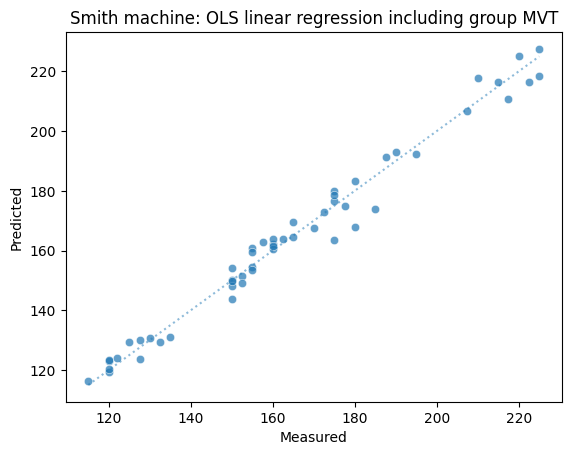

In [659]:
model2_ml = LinearRegression()
y_pred2_ml, eval_fig2_ml, model2_ml_attributes = model_data_vs_stat(df_sm2, x_columns=['slope', 'intercept', 'group MVT'], 
    model=model2_ml, model_name='Smith machine: OLS linear regression including group MVT')
eval_fig2_ml.figure.savefig('../output/figures/individual model figures/sm_model2_ml.png')
# Using group MVT did not improve evaluation metrics

## Model 4

### without hyperparameter tuning


Smith machine: Lasso regression (no CV) evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.42		3.00		1.41
MAE: 			3.41		2.65		0.76
mean error: 		0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.06		30.84		-0.78

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.36563362186556175
	LV intercept: 1.0947335816468138
	model intercept:  -4.740837228619995


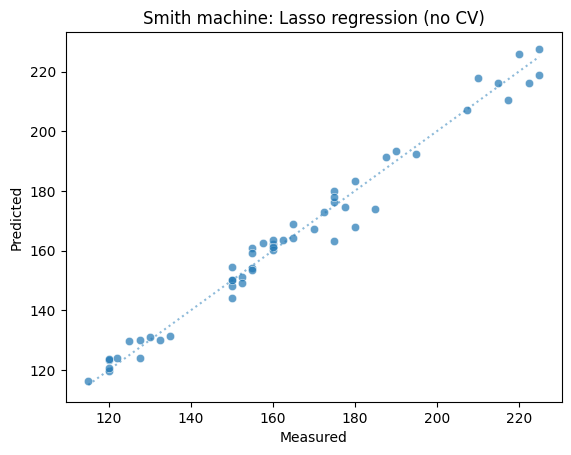

In [660]:

model4 = linear_model.Lasso()
y_pred4, eval_fig4, model4_attributes =  model_data_vs_stat(df_sm2, 
    ['slope', 'intercept'], model4, model_name='Smith machine: Lasso regression (no CV)')

In [487]:
model4_attributes

{'LV slope': 0.36563362186556175,
 'LV intercept': 1.0947335816468138,
 'model intercept': -4.740837228619995}

### Model 4 with Cross Validation


Smith machine: Lasso regression with CV evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.42		3.00		1.42
MAE: 			3.41		2.65		0.76
mean error: 		-0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.05		30.84		-0.78

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.3611535848586901
	LV intercept: 1.0910027187054636
	model intercept:  -4.679055373112561


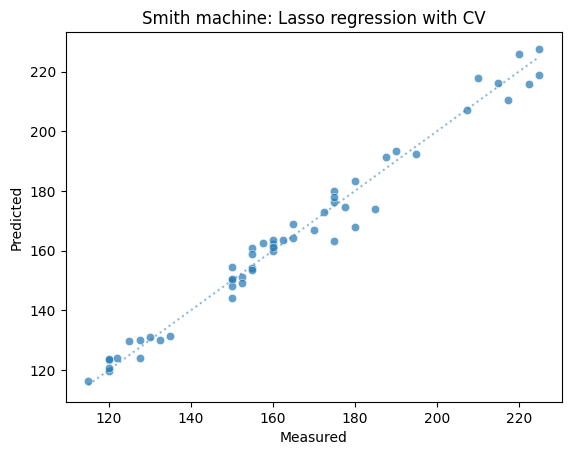

In [666]:

model4cv = LassoCV(cv=5, random_state=0)
y_pred4cv, eval_fig4cv, model4cv_attributes =  model_data_vs_stat(df_sm2, 
    ['slope', 'intercept'], model4cv, model_name='Smith machine: Lasso regression with CV')
eval_fig4cv.figure.savefig('../output/figures/individual model figures/sm_model4cv.png')

In [500]:
print(f'Model alpha: {model4cv.alpha_}')
print(f'Alphas used in CV: {model4cv.alphas_}')
print(f'Iterations: {model4cv.n_iter_}')

Model alpha: 1.1252831163472083
Alphas used in CV: [1.12528312e+03 1.04944280e+03 9.78713868e+02 9.12751829e+02
 8.51235411e+02 7.93864993e+02 7.40361149e+02 6.90463286e+02
 6.43928371e+02 6.00529754e+02 5.60056059e+02 5.22310155e+02
 4.87108198e+02 4.54278736e+02 4.23661870e+02 3.95108478e+02
 3.68479489e+02 3.43645204e+02 3.20484668e+02 2.98885074e+02
 2.78741220e+02 2.59954995e+02 2.42434898e+02 2.26095597e+02
 2.10857511e+02 1.96646420e+02 1.83393110e+02 1.71033028e+02
 1.59505974e+02 1.48755806e+02 1.38730162e+02 1.29380213e+02
 1.20660420e+02 1.12528312e+02 1.04944280e+02 9.78713868e+01
 9.12751829e+01 8.51235411e+01 7.93864993e+01 7.40361149e+01
 6.90463286e+01 6.43928371e+01 6.00529754e+01 5.60056059e+01
 5.22310155e+01 4.87108198e+01 4.54278736e+01 4.23661870e+01
 3.95108478e+01 3.68479489e+01 3.43645204e+01 3.20484668e+01
 2.98885074e+01 2.78741220e+01 2.59954995e+01 2.42434898e+01
 2.26095597e+01 2.10857511e+01 1.96646420e+01 1.83393110e+01
 1.71033028e+01 1.59505974e+01 1.4

## With Train Test Split

### Model 1


Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.52		3.52		0.00
MAE: 			3.20		3.20		0.00
mean error: 		3.20		3.20		0.00
R^2: 			0.98		0.98		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	165.70		165.70		0.00
predictions std: 	26.82		26.82		0.00

target mean: 162.50
target std: 25.98


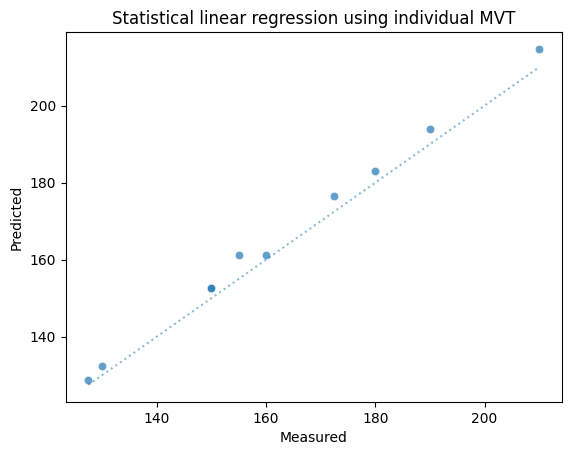

In [850]:
y_pred_stat_test, eval_statmodel1_fig_test = stat_modelling(sm_test, 
    model_name='Statistical linear regression using individual MVT');
eval_statmodel1_fig_test.figure.savefig('../output/figures/individual model figures/sm_model1_test.png')

### Model 2


Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			5.38		3.52		1.86
MAE: 			4.42		3.20		1.22
mean error: 		4.42		3.20		1.22
R^2: 			0.95		0.98		-0.03
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	166.92		165.70		1.22
predictions std: 	28.28		26.82		1.46

target mean: 162.50
target std: 25.98


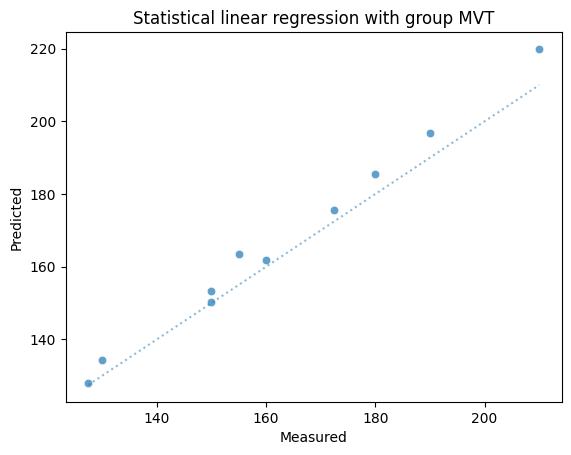

In [851]:
y_pred_stat2_test, eval_statmodel2_fig_test = stat_modelling(sm_test, model_name='Statistical linear regression with group MVT', mvt='group');
eval_statmodel2_fig_test.figure.savefig('../output/figures/individual model figures/sm_model2_test.png')

### Model 3


Model 3 evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			4.21		20.40		-16.19
MAE: 			3.17		3.58		-0.41
mean error: 		1.99		-0.00		1.99
R^2: 			0.97		0.98		-0.01
Pearson r statistic: 	1.00		0.99		0.01
			p=0.00		p=0.00

predictions mean: 	164.49		164.63		-0.14
predictions std: 	27.65		31.31		-3.66

target mean: 		162.50		164.63		-2.13
target std: 		25.98		32.02		-6.04

Model feature coefficients
	LV slope: 0.40841262926157706
	LV intercept: 1.1444111419912637
	model intercept:  -7.863213862054039


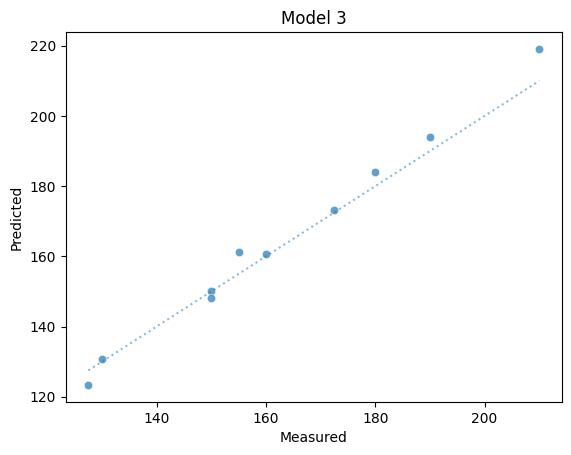

In [849]:
model3_tts = LinearRegression()
y_pred3_train, y_pred3_test, model3_tts_features, eval_fig3_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], model=model3_tts, model_name='Model 3')
eval_fig3_test.figure.savefig('../output/figures/individual model figures/sm_model3_test.png')

In [852]:
model3_tts_features

{'LV slope': 0.40841262926157706,
 'LV intercept': 1.1444111419912637,
 'model intercept': -7.863213862054039}

In [853]:
# See if model predictions are same as when calculated using coefficients and intercept
df_test3 = sm_test[['Load-1RM-1', 'slope', 'intercept', '100%MV']].copy()
df_test3['model prediction'] = y_pred3_test
df_test3['arithmetic prediction'] = df_test3['slope']*model3_tts_features['LV slope'] + df_test3['intercept']*model3_tts_features['LV intercept'] + model3_tts_features['model intercept']
df_test3
# yes it does!

Load-1RM-1       slope   intercept  100%MV  model prediction  \
5        130.0 -130.520595  167.598112    0.27        130.631674   
33       127.5 -132.400121  161.915406    0.25        123.360699   
1        150.0 -149.626853  191.515539    0.26        150.199807   
43       155.0 -154.342401  202.873222    0.27        161.271776   
2        150.0 -138.272309  185.763824    0.24        148.254819   
16       160.0 -144.211322  198.718063    0.26        160.654227   
10       190.0 -201.533301  248.283980    0.27        193.966994   
46       172.5 -171.283975  219.421291    0.25        173.290418   
18       180.0 -175.254283  230.331103    0.27        184.154204   
0        210.0 -213.341118  274.460590    0.28        219.101336   

    arithmetic prediction  
5              130.631674  
33             123.360699  
1              150.199807  
43             161.271776  
2              148.254819  
16             160.654227  
10             193.966994  
46             173.290418  
18             184.154204  
0              219.101336

#### Model 1


Model 1 evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			1.86		2.18		-0.32
MAE: 			1.45		1.23		0.22
mean error: 		0.98		-0.00		0.98
R^2: 			0.99		1.00		-0.00
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	163.48		164.63		-1.15
predictions std: 	25.69		31.60		-5.92

target mean: 		162.50		164.63		-2.13
target std: 		25.98		32.02		-6.04

Model feature coefficients
	LV slope: 0.2660932581553373
	LV intercept: 1.0051418866093564
	LV 100%MV: -160.0585694299328
	model intercept:  39.116176537409075


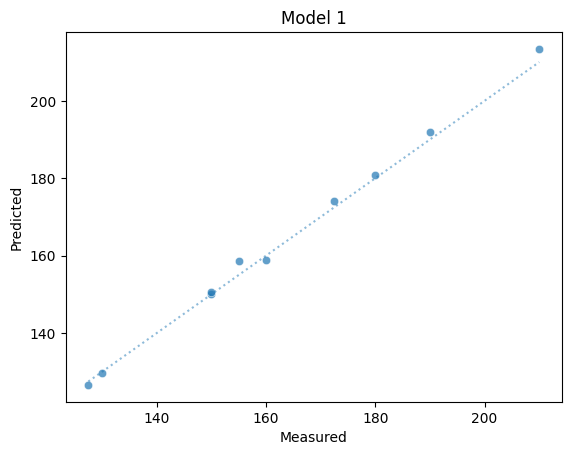

In [854]:
model1_tts = LinearRegression()
y_pred1_train, y_pred1_test, model1_tts_attributes, eval_fig1_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept', '100%MV'], model=model1_tts, model_name='Model 1')
eval_fig1_test.figure.savefig('../output/figures/individual model figures/sm_model1_test_split.png')
# Including MVT improves predictions

### Model 4 with Cross Validation


Model 4 with CV and train test split evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			4.21		20.40		-16.19
MAE: 			3.17		3.58		-0.41
mean error: 		1.99		-0.00		1.99
R^2: 			0.97		0.98		-0.01
Pearson r statistic: 	1.00		0.99		0.01
			p=0.00		p=0.00

predictions mean: 	164.49		164.63		-0.14
predictions std: 	27.65		31.31		-3.66

target mean: 		162.50		164.63		-2.13
target std: 		25.98		32.02		-6.04

Model feature coefficients
	LV slope: 0.40841262926157706
	LV intercept: 1.1444111419912637
	model intercept:  -7.863213862054039


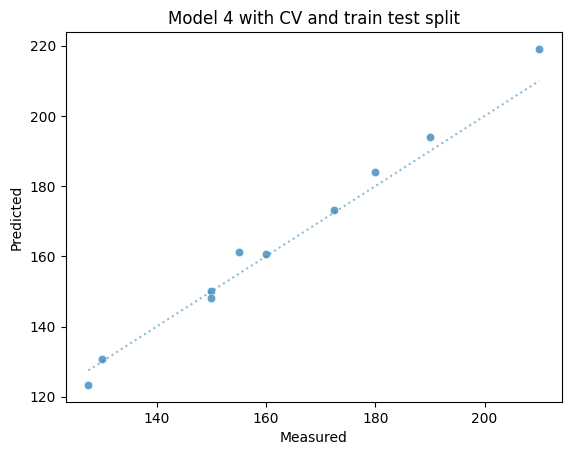

In [855]:
model4cv_tts = LassoCV(cv=5, random_state=0)
y_pred4_train, y_pred4_test, model4_tts_attributes, eval_fig4_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], model=model3_tts, model_name='Model 4 with CV and train test split')
eval_fig4_test.figure.savefig('../output/figures/individual model figures/sm_model4_test.png')

# Free weight

## Model 1


Free Weight: Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.57		3.57		0.00
MAE: 			3.04		3.04		0.00
mean error: 		2.56		2.56		0.00
R^2: 			0.98		0.98		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	138.84		138.84		0.00
predictions std: 	28.21		28.21		0.00

target mean: 136.28
target std: 27.07


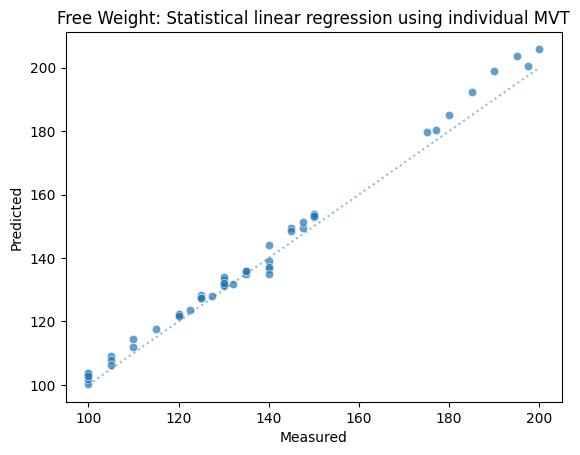

In [654]:
fw_y_pred_stat, fw_eval_statmodel1_fig = stat_modelling(df_fw2, 
    model_name='Free Weight: Statistical linear regression using individual MVT');
fw_eval_statmodel1_fig.figure.savefig('../output/figures/individual model figures/fw_model1.png')

## Model 2


Free Weight: Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.79		3.57		0.22
MAE: 			3.23		3.04		0.19
mean error: 		2.54		2.56		-0.02
R^2: 			0.98		0.98		-0.00
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	138.82		138.84		-0.02
predictions std: 	27.89		28.21		-0.32

target mean: 136.28
target std: 27.07


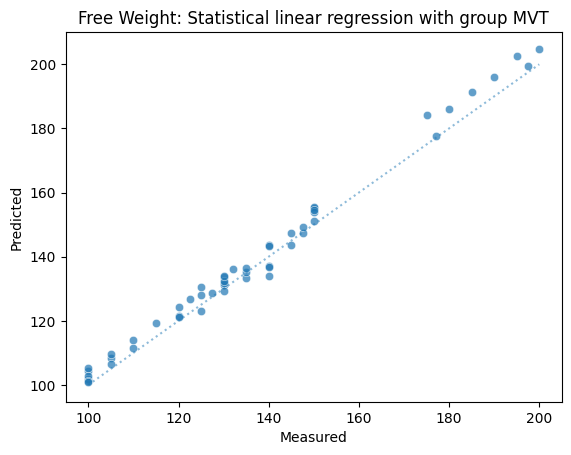

In [649]:
fw_y_pred_stat2, fw_eval_statmodel2_fig = stat_modelling(df_fw2, model_name='Free Weight: Statistical linear regression with group MVT', mvt='group');
fw_eval_statmodel2_fig.figure.savefig('../output/figures/individual model figures/fw_model2.png')

## Model 3


Free weight: OLS linear Regression evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.51		3.57		-1.06
MAE: 			2.02		3.04		-1.03
mean error: 		-0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.69		28.21		-1.52

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.42120300024549373
	LV intercept: 1.0840162420367898
	model intercept:  2.535853026700181


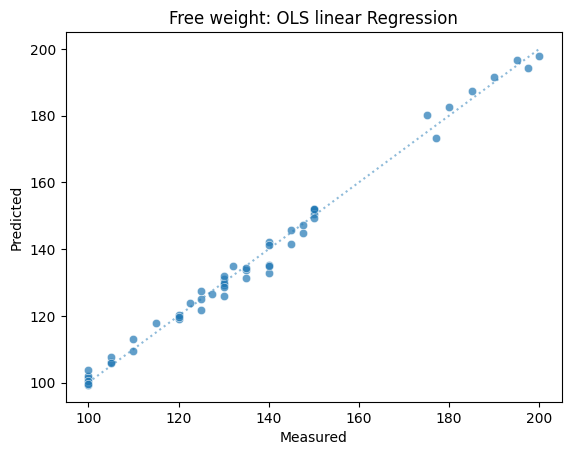

In [663]:
fw_model3 = LinearRegression()
fw_y_pred3, fw_eval_fig3, fw_model3_attributes =  model_data_vs_stat(df_fw2, ['slope', 'intercept'], 
    fw_model3, model_name='Free weight: OLS linear Regression')
fw_eval_fig3.figure.savefig('../output/figures/individual model figures/fw_model3.png')

## Model 4

### without hyperparameter tuning


Free weight: Lasso regression (no CV) evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.53		3.57		-1.04
MAE: 			2.02		3.04		-1.02
mean error: 		0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.63		28.21		-1.58

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.35587183146967105
	LV intercept: 1.0330025146112882
	model intercept:  2.629416245308761


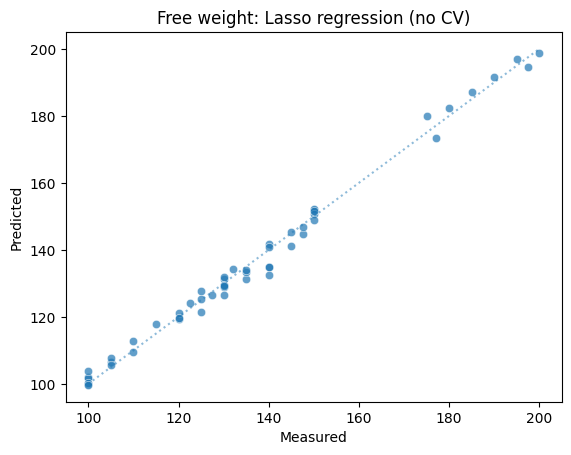

In [664]:
fw_model4 = linear_model.Lasso()
fw_y_pred4, fw_eval_fig4, fw_model4_attributes =  model_data_vs_stat(df_fw2, 
    ['slope', 'intercept'], fw_model4, model_name='Free weight: Lasso regression (no CV)')

### Model 4 with Cross Validation


Free weight: Lasso regression with CV evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.53		3.57		-1.04
MAE: 			2.02		3.04		-1.02
mean error: 		0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.64		28.21		-1.57

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.3603266338084118
	LV intercept: 1.0364822926717228
	model intercept:  2.6228153358737814


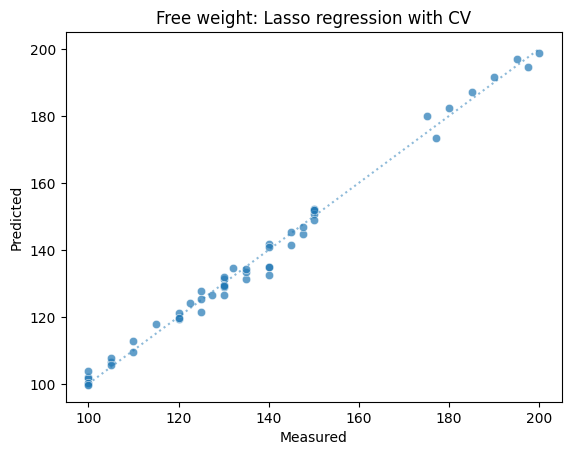

In [667]:
fw_model4cv = LassoCV(cv=5, random_state=0)
fw_y_pred4cv, fw_eval_fig4cv, fw_model4cv_attributes =  model_data_vs_stat(df_fw2, 
    ['slope', 'intercept'], fw_model4cv, model_name='Free weight: Lasso regression with CV')
fw_eval_fig4cv.figure.savefig('../output/figures/individual model figures/fw_model4cv.png')

In [668]:
print(f'Model alpha: {model4cv.alpha_}')
print(f'Iterations: {model4cv.n_iter_}')

Model alpha: 1.1252831163472083
Iterations: 130


## With Train Test split


Free weight: Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.81		3.81		0.00
MAE: 			3.05		3.05		0.00
mean error: 		2.34		2.34		0.00
R^2: 			0.98		0.98		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	136.59		136.59		0.00
predictions std: 	27.52		27.52		0.00

target mean: 134.25
target std: 25.61


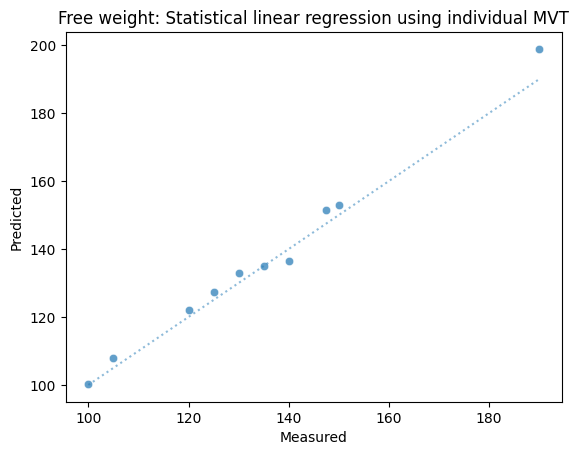

In [1162]:
# Model 1
fw_y_pred_stat_test, fw_eval_statmodel1_fig_test = stat_modelling(fw_test, 
    model_name='Free weight: Statistical linear regression using individual MVT');
fw_eval_statmodel1_fig_test.figure.savefig('../output/figures/individual model figures/fw_model1_test.png')


Free weight: Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.67		3.81		-0.15
MAE: 			3.27		3.05		0.22
mean error: 		2.32		2.34		-0.02
R^2: 			0.98		0.98		0.00
Pearson r statistic: 	0.99		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.57		136.59		-0.02
predictions std: 	26.14		27.52		-1.38

target mean: 134.25
target std: 25.61


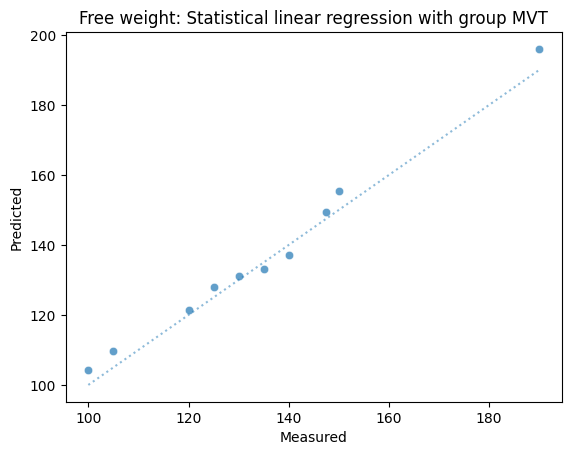

In [1163]:
# Model 2
fw_y_pred_stat2_test, fw_eval_statmodel2_fig_test = stat_modelling(fw_test, model_name='Free weight: Statistical linear regression with group MVT', mvt='group');
fw_eval_statmodel2_fig_test.figure.savefig('../output/figures/individual model figures/fw_model2_test.png')


Free weight: Model 3 evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			2.43		6.46		-4.03
MAE: 			1.95		2.03		-0.08
mean error: 		-0.29		0.00		-0.29
R^2: 			0.99		0.99		-0.00
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	133.96		136.76		-2.80
predictions std: 	24.27		27.23		-2.96

target mean: 		134.25		136.76		-2.51
target std: 		25.61		27.68		-2.08

Model feature coefficients
	LV slope: 0.3767221136157253
	LV intercept: 1.0509735976329702
	model intercept:  2.246434456060655


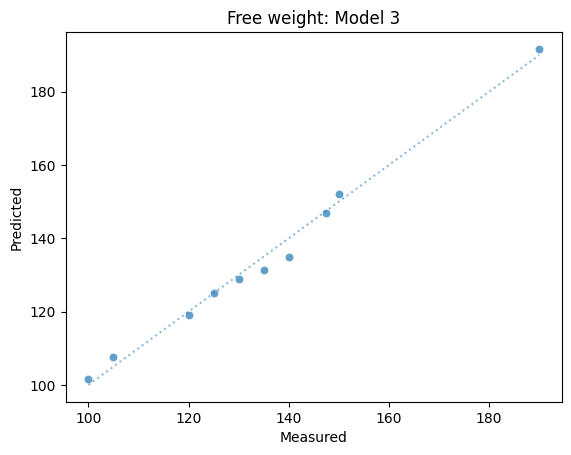

In [1164]:
# Model 3
fw_model3_tts = LinearRegression()
fw_y_pred3_train, fw_y_pred3_test, fw_model3_tts_features, fw_eval_fig3_test = model_data(fw_train, fw_test, 
    x_columns=['slope', 'intercept'], model=fw_model3_tts, model_name='Free weight: Model 3')
fw_eval_fig3_test.figure.savefig('../output/figures/individual model figures/fw_model3_test.png')


Free weight: Model 4 with CV and train test split evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			2.43		6.46		-4.03
MAE: 			1.95		2.03		-0.08
mean error: 		-0.29		0.00		-0.29
R^2: 			0.99		0.99		-0.00
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	133.96		136.76		-2.80
predictions std: 	24.27		27.23		-2.96

target mean: 		134.25		136.76		-2.51
target std: 		25.61		27.68		-2.08

Model feature coefficients
	LV slope: 0.3767221136157253
	LV intercept: 1.0509735976329702
	model intercept:  2.246434456060655


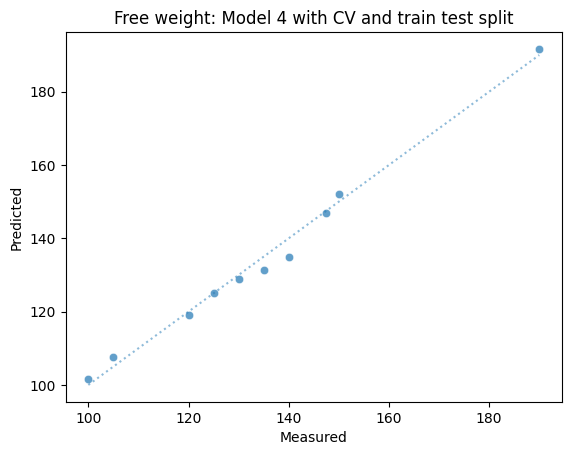

In [1165]:
# Model 4 with Cross Validation
fw_model4cv_tts = LassoCV(cv=5, random_state=0)
fw_y_pred4_train, fw_y_pred4_test, fw_model4_tts_attributes, fw_eval_fig4_test = model_data(fw_train, fw_test, 
    x_columns=['slope', 'intercept'], model=fw_model3_tts, model_name='Free weight: Model 4 with CV and train test split')
fw_eval_fig4_test.figure.savefig('../output/figures/individual model figures/fw_model4_test.png')

# Compile results for comparison

In [1113]:
# Smith machine
sm_predictions = pd.DataFrame({
    'Measured': df_sm2['Load-1RM-1'].values,
    'Stat ind MVT': y_pred_stat,
    'Stat grp MVT': y_pred_stat2,
    'OLS': y_pred3,
    'Lasso': y_pred4cv,
})
print(sm_predictions.shape)
sm_predictions.head(2)

(52, 5)


Measured  Stat ind MVT  Stat grp MVT         OLS       Lasso
0     210.0    214.725077    214.725077  217.766997  217.709285
1     150.0    152.612557    152.612557  150.065880  150.226644

In [1114]:
# Free weight
fw_predictions = pd.DataFrame({
    'Measured': df_fw2['Load-1RM-1'].values,
    'Stat ind MVT': fw_y_pred_stat,
    'Stat grp MVT': fw_y_pred_stat2,
    'OLS': fw_y_pred3,
    'Lasso': fw_y_pred4cv,
})
print(fw_predictions.shape)
fw_predictions.head(2)

(52, 5)


Measured  Stat ind MVT  Stat grp MVT         OLS       Lasso
0     190.0    198.882528    198.882528  191.733600  191.555970
1     120.0    122.134991    122.134991  119.102861  119.301499

In [1116]:
# save predictions
save_csv(fw_predictions, 'fw_predictions', path=r'../output/predictions/')
save_csv(sm_predictions, 'sm_predictions', path=r'../output/predictions/')

File saved:  ../output/predictions//fw_predictions
File saved:  ../output/predictions//sm_predictions


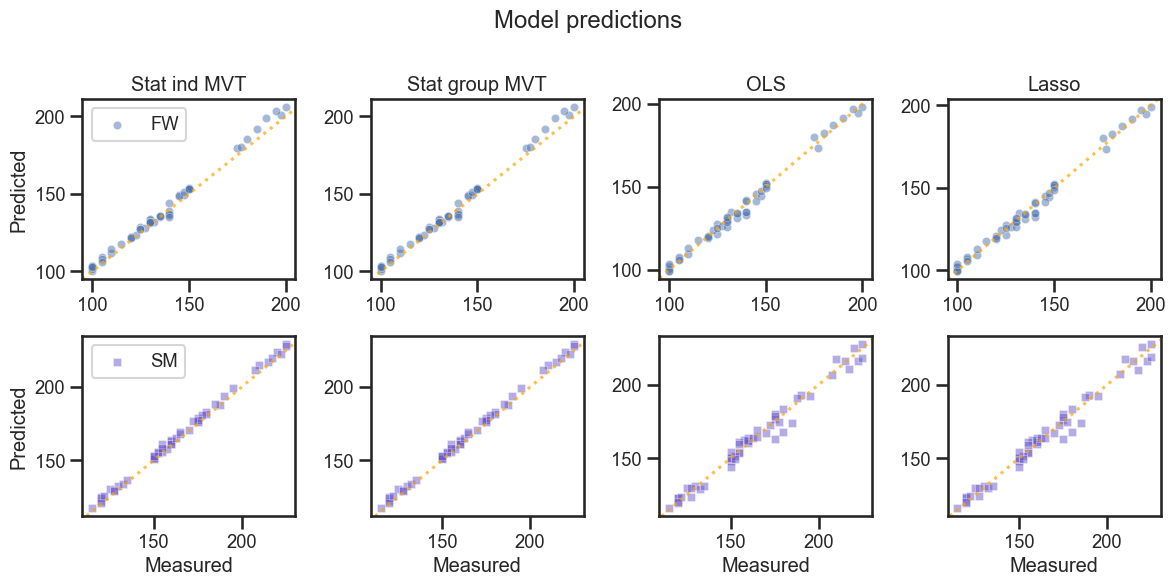

In [1048]:
# def compare_models(fw_predictions, sm_predictions, title='Model predictions', context='talk'):
#     """
#     Plot predictions from all the models for each of the free weight and smith machine data sets.
#         Parmaters:
#         - fw_predictions, sm_predictions (DataFrame): Dataframe with target data ('Measured') and model predictions.
#         - title (str): Overall plot title.
#         - context (None, dict, or one of {paper, notebook, talk, poster})
#     """
#     fw_models = fw_predictions.columns[1:].to_list()
#     # sm_models = sm_predictions.columns[1:].to_list() # this line only relevant if models for free weight data don't match models for smith machine data

#     font_scale=.8 if context=='talk' else 1
#     rc={'lines.markersize': 6} if context=='talk' else None
#     sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
#         rc=rc)
#     ncols = len(fw_models)
#     fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(3*ncols, 2*3))
#     for index, model in enumerate(fw_models):
#         ax[0, index].axline(xy1=(150, 150), slope=1, alpha=0.7, ls=':', color='orange')
#         if index == 0:
#             ax[0, index].set_ylabel('Predicted') 
#         sns.scatterplot(data=fw_predictions, x='Measured', y=model, ax=ax[0, index],
#             alpha=0.5, marker='o', legend=(True if index==0 else False), label='FW',
#         ).set(xlabel=None, ylabel=None)
#         ax[0, index].set_title(model)
#         if index == 0:
#             ax[0, index].set_ylabel('Predicted') 

#     # for index, model in enumerate(sm_models): # this line only relevant if models for free weight data don't match models for smith machine data
#         ax[1, index].axline(xy1=(150, 150), slope=1, alpha=0.7, ls=':', color='orange') 
#         sns.scatterplot(data=sm_predictions, x='Measured', y=model, ax=ax[1, index],
#             alpha=0.5, marker='s', legend=(True if index==0 else False), 
#             label='SM', color='slateblue',
#         ).set(ylabel=None)
#         if index == 0:
#             ax[1, index].set_ylabel('Predicted')   
#         # if model != fw_models[index]: # this line only relevant if models for free weight data don't match models for smith machine data
#         #     ax[1, index].set_title(model)
#     fig.suptitle(title)
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

# predictions_plot = compare_models(fw_predictions, sm_predictions, title='Model predictions', 
#     context='talk')
# # predictions_plot.savefig('../output/figures/predictions_plot.png')

In [1173]:
# To plot evaluation metrics:
import matplotlib.pyplot as plt
def compare_models(fw_predictions, sm_predictions, title='Model predictions', 
    context='talk', annotate=True, ymin=-1.5, ymax=5):
    """2022-11-27 23:00

    Plot predictions from all the models for each of the free weight and smith machine data sets.
        Parmaters:
            - fw_predictions, sm_predictions (DataFrame): 
                Dataframes that each contain target data ('Measured' column) and model predictions
                (1 column per model).
            - title (str): Overall plot title.
            - context (None or str): Seaborn .set_theme() parameter. 
                One of {paper, notebook, talk (default), poster}. If None, set to 'default (notebook)'.
            - annotate (bool): Whether or not to annotate the bar graph with values. Default is True.
        Returns:
            - figure with scatter plots of measured vs. predicted values for all models.
            - figure with bar charts of mean absolute error and mean error for all models.
            - DataFrames for each of the free weight and smith machine data sets containing:
                mean absolute error and mean error for all models.

    Command syntax:
        scatterplot, error_plot, fw_metrics, sm_metrics = compare_models(fw_predictions, 
        sm_predictions, title='Model predictions', context='talk')

        scatterplot.savefig('../output/figures/Measured vs predicted for all samples.png')
        error_plot.savefig('../output/figures/Error bar chart for all samples.png')
        path = r'../output/predictions'
        save_csv(fw_metrics, 'free weight errors', path=path)
        save_csv(sm_metrics, 'smith machine errors', path=path)
    """
    fw_models = fw_predictions.columns[1:].to_list()
    sns.reset_defaults()    
    %matplotlib inline
    font_scale=.8 if context=='talk' else 1
    rc={'lines.markersize': 6} if context=='talk' else None
    sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
        rc=rc)
    ncols = len(fw_models)
    fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(3*ncols, 2*3))
    fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(3*ncols, 5))
    fw_error = pd.DataFrame()
    sm_error = pd.DataFrame()
    for index, model in enumerate(fw_models):
        # Calculate error
        fw_error[model] = fw_predictions[model] - fw_predictions['Measured'] 
        sm_error[model] = sm_predictions[model] - sm_predictions['Measured'] 

        # Plot measured vs. predicted values for each model
        ax[0, index].axline(xy1=(150, 150), slope=1, alpha=0.8, linewidth=0.5, color='orange')
        if index == 0:
            ax[0, index].set_ylabel('Predicted') 
        sns.scatterplot(data=fw_predictions, x='Measured', y=model, ax=ax[0, index],
            alpha=0.5, marker='o', legend=(True if index==0 else False), label='FW',
        ).set(xlabel=None, ylabel=None)
        ax[0, index].set_title(model)
        if index == 0:
            ax[0, index].set_ylabel('Predicted') 

        ax[1, index].axline(xy1=(150, 150), slope=1, alpha=0.8, linewidth=0.5, color='orange')
        sns.scatterplot(data=sm_predictions, x='Measured', y=model, ax=ax[1, index],
            alpha=0.5, marker='s', legend=(True if index==0 else False), 
            label='SM', color='slateblue',
        ).set(ylabel=None)
        if index == 0:
            ax[1, index].set_ylabel('Predicted')   
        
    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    fig2.tight_layout(rect=[0, 0, 1, 0.9])

    # Calculate remaining evaluation metrics and reshape dataframe for plotting
    fw_error['Metric'] = 'Error'
    fw_mae = abs(fw_error.iloc[:,:-1])
    fw_mae['Metric'] = 'MAE'
    fw_metrics = pd.concat([fw_error, fw_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (free weight data): {fw_metrics.shape}')

    sm_error['Metric'] = 'Error'
    sm_mae = abs(fw_error.iloc[:,:-1])
    sm_mae['Metric'] = 'MAE'
    sm_metrics = pd.concat([sm_error, sm_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (Smith machine data): {sm_metrics.shape}')
    
    # Plot evaluation metrics: 
    sns.barplot(data=fw_metrics, y='value', x='model', hue='Metric', 
        errorbar=('se', 1.96), # error bars set to 95% confidence interval, or 1.96*standard error
        ax=ax2[0]).set_ylim([ymin, ymax])
    ax2[0].axhline(y=0, ls=':', color='grey')
    ax2[0].set(ylabel='kg', xlabel=None)
    ax2[0].set_title('Free weight')
    sns.barplot(data=sm_metrics, y='value', x='model', hue='Metric', 
        errorbar=('se', 1.96),
        ax=ax2[1]).set_ylim([ymin, ymax])    
    ax2[1].axhline(y=0, ls=':', color='grey')

    # Label bars with value
    if annotate:
        for i in ax2[0].containers:
                ax2[0].bar_label(i, fmt='%.1f', label_type='center') 
        for i in ax2[1].containers:
                ax2[1].bar_label(i, fmt='%.1f', label_type='center') 
    # Titles and axis labels
    ax2[1].set(ylabel='kg', xlabel=None)
    ax2[0].set_title('Free weight')
    ax2[1].set_title('Smith machine')
    fig2.suptitle('Model evaluation metrics')
    return fig, fig2, fw_metrics, sm_metrics


Metrics dataframe shape (free weight data): (416, 3)
Metrics dataframe shape (Smith machine data): (416, 3)
File saved:  ../output/predictions/free weight errors
File saved:  ../output/predictions/smith machine errors


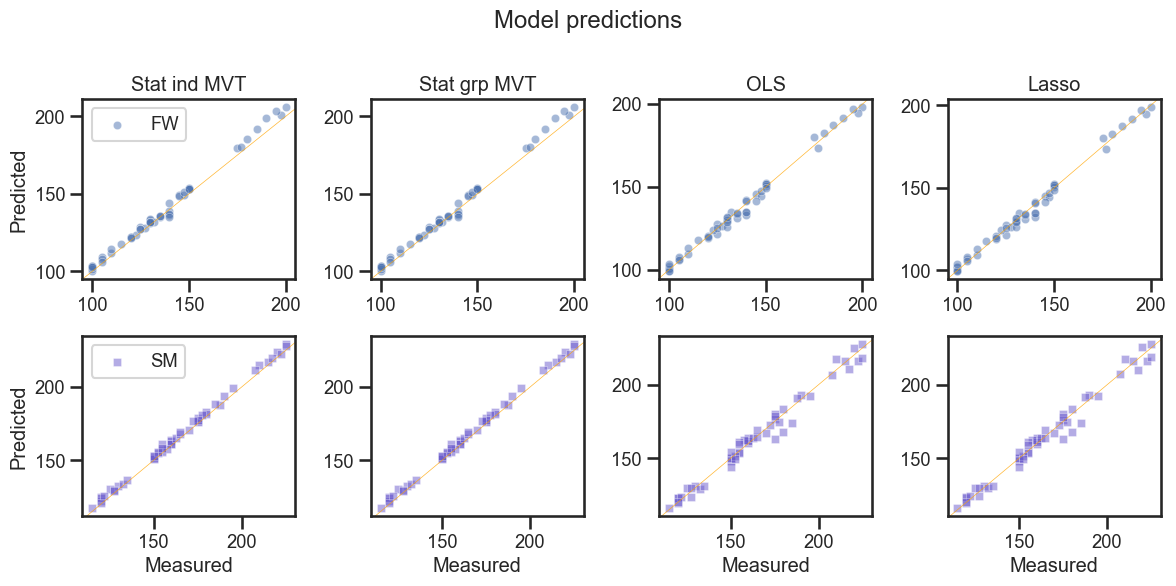

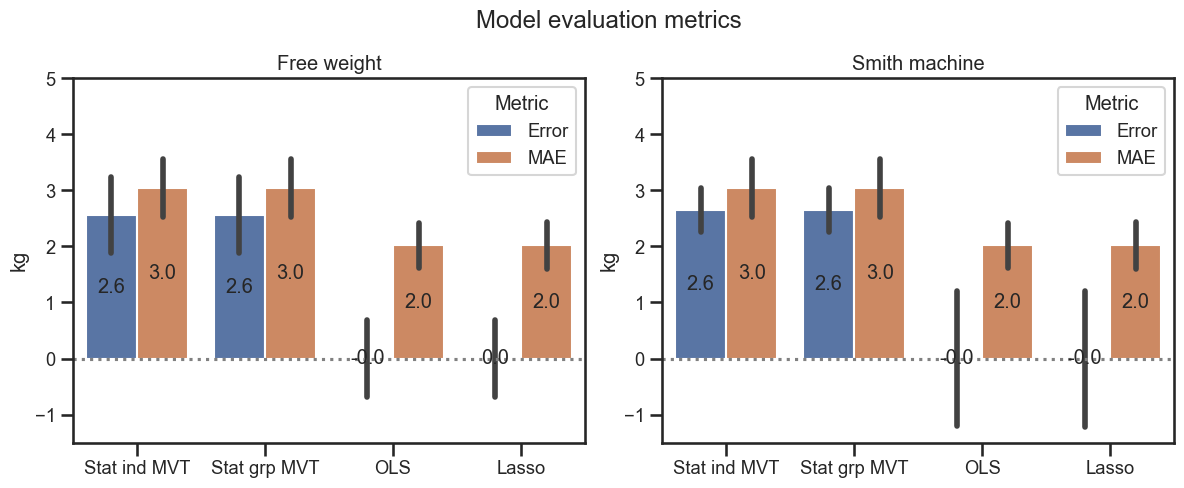

In [1130]:

scatterplot, error_plot, fw_metrics, sm_metrics = compare_models(fw_predictions, 
    sm_predictions, title='Model predictions', context='talk')

scatterplot.savefig('../output/figures/Measured vs predicted for all samples.png')
error_plot.savefig('../output/figures/Error bar chart for all samples.png')
path = r'../output/predictions'
save_csv(fw_metrics, 'free weight errors', path=path)
save_csv(sm_metrics, 'smith machine errors', path=path)

In [1161]:
# Compile model coefficients
features = pd.DataFrame({
    ('SM', 'OLS'): model3_attributes, # Smith machine
    ('SM', 'Lasso'): model4cv_attributes,
    ('FW', 'OLS'): fw_model3_attributes, # free weight
    ('FW', 'Lasso'): fw_model4cv_attributes
}).transpose()
features.index.names = ['Exercise', 'Model']

path=r'../output/models'
save_csv(features, 'coefficients sm models_trained on all data', path)
features

File saved:  ../output/models/coefficients sm models_trained on all data


LV slope  LV intercept  model intercept
Exercise Model                                         
SM       OLS    0.402142      1.125122        -5.241220
         Lasso  0.361154      1.091003        -4.679055
FW       OLS    0.421203      1.084016         2.535853
         Lasso  0.360327      1.036482         2.622815

## Test set

In [1171]:
# Smith machine
sm_test_predictions = pd.DataFrame({
    'Measured': sm_test['Load-1RM-1'].values,
    'Stat ind MVT': y_pred_stat_test,
    'Stat grp MVT': y_pred_stat2_test,
    'OLS': y_pred3_test,
    'Lasso': y_pred4_test,
})
print(sm_test_predictions.shape)

# Free weight
fw_test_predictions = pd.DataFrame({
    'Measured': fw_test['Load-1RM-1'].values,
    'Stat ind MVT': fw_y_pred_stat_test,
    'Stat grp MVT': fw_y_pred_stat2_test,
    'OLS': fw_y_pred3_test,
    'Lasso': fw_y_pred4_test,
})
print(fw_test_predictions.shape)
path=r'../output/predictions/test set predictions'

# Save
save_csv(sm_test_predictions, 'sm_test_predictions', path)
save_csv(fw_test_predictions, 'fw_test_predictions', path)

(10, 5)
(10, 5)
File saved:  ../output/predictions/test set predictions/sm_test_predictions
File saved:  ../output/predictions/test set predictions/fw_test_predictions


Metrics dataframe shape (free weight data): (80, 3)
Metrics dataframe shape (Smith machine data): (80, 3)
File saved:  ../output/predictions/test set predictions/free weight errors_test set
File saved:  ../output/predictions/test set predictions/smith machine errors_test set


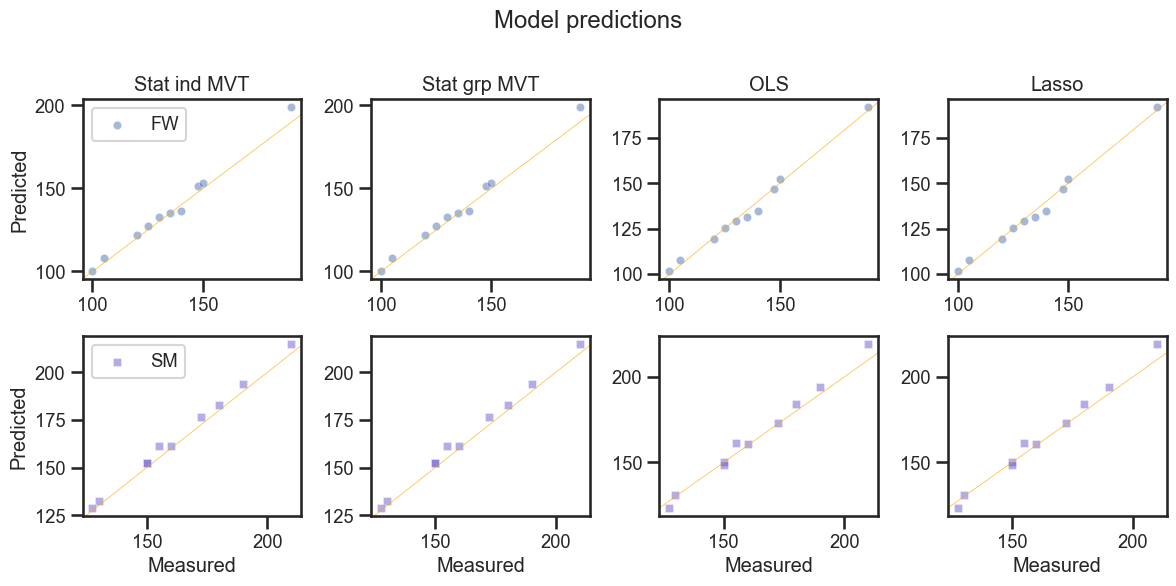

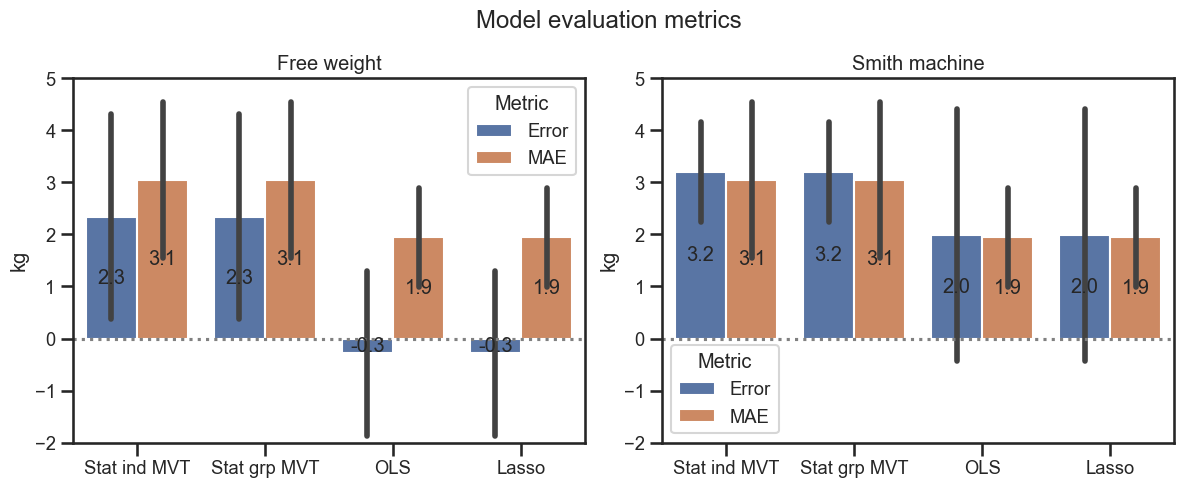

In [1174]:
test_scatterplot, test_error_plot, test_fw_metrics, test_sm_metrics = compare_models(fw_test_predictions, 
    sm_test_predictions, title='Model predictions', context='talk', ymin=-2)

test_scatterplot.savefig('../output/figures/test set figures/Measured vs predicted for test set.png')
test_error_plot.savefig('../output/figures/test set figures/Error bar chart for all samples.png')
path = r'../output/predictions/test set predictions'
save_csv(test_fw_metrics, 'free weight errors_test set', path=path)
save_csv(test_sm_metrics, 'smith machine errors_test set', path=path)

In [1175]:
# Compile model coefficients
tts_features = pd.DataFrame({
    ('SM', 'OLS'): model3_tts_features, # Smith machine
    ('SM', 'Lasso'): model4_tts_attributes,
    ('FW', 'OLS'): fw_model3_tts_features, # free weight
    ('FW', 'Lasso'): fw_model4_tts_attributes
}).transpose()
tts_features.index.names = ['Exercise', 'Model']

path=r'../output/models/models with train test split'
save_csv(tts_features, 'coefficients sm models_trained on train test split', path)
tts_features

File saved:  ../output/models/models with train test split/coefficients sm models_trained on train test split


LV slope  LV intercept  model intercept
Exercise Model                                         
SM       OLS    0.408413      1.144411        -7.863214
         Lasso  0.408413      1.144411        -7.863214
FW       OLS    0.376722      1.050974         2.246434
         Lasso  0.376722      1.050974         2.246434

# Save trained machine learning models

In [1177]:
# Save trained models
    # Models trained on all data
path = r'../output/models'
savepickle(model3,'sm_OLS',path=path)
savepickle(model4cv,'sm_LassoCV',path=path)
savepickle(fw_model3,'fw_OLS',path=path)
savepickle(fw_model4cv,'fw_LassoCV',path=path)

    # Models trained with train-test split
path = r'../output/models/models with train test split'
savepickle(model3_tts,'sm_OLS_tts',path=path)
savepickle(model4cv_tts,'sm_LassoCV_tts',path=path)
savepickle(fw_model3_tts,'fw_OLS_tts',path=path)
savepickle(fw_model4cv_tts,'fw_LassoCV_tts',path=path)

File saved:  ../output/models/sm_OLS.sav
File saved:  ../output/models/sm_LassoCV.sav
File saved:  ../output/models/fw_OLS.sav
File saved:  ../output/models/fw_LassoCV.sav
File saved:  ../output/models/models with train test split/sm_OLS_tts.sav
File saved:  ../output/models/models with train test split/sm_LassoCV_tts.sav
File saved:  ../output/models/models with train test split/fw_OLS_tts.sav
File saved:  ../output/models/models with train test split/fw_LassoCV_tts.sav


# Test model on mean data from a different study
https://www.massmember.com/products/mass-subscription/categories/1458811/posts/4920139

In [987]:
print(df_fw['Load80%1RM'].mean())
df_sm2.sort_values('Load80%1RM').head()

108.58653846153847


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
45  26.0  58.7   169.0        23.0        46.0        69.0        92.0   
22  19.0  57.9   174.0        24.0        48.0        72.0        96.0   
50  19.0  62.5   174.0        24.0        48.0        72.0        96.0   
8   22.0  59.8   179.0        24.0        48.0        72.0        96.0   
3   21.0  58.4   172.0        24.0        48.0        72.0        96.0   

    Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
45       103.5       115.0    1.07   0.96   0.77   0.54   0.37    0.27   
22       108.0       120.0    1.07   0.89   0.69   0.54   0.42    0.28   
50       108.0       120.0    1.11   0.87   0.71   0.50   0.39    0.28   
8        108.0       120.0    1.06   0.90   0.65   0.53   0.38    0.26   
3        108.0       120.0    1.07   0.91   0.73   0.53   0.42    0.27   

         slope   intercept  group MVT  
45 -108.654462  146.824126   0.255577  
22 -124.667606  158.826165   0.255577  
50 -117.960571  153.887967   0.255577  
8  -120.359281  153.826347   0.255577  
3  -121.181946  157.374175   0.255577

In [975]:
sample_mean = {
    'Load50%1RM': 60.5,
    'Load60%1RM': 72.0,
    'Load70%1RM': 84.8,
    'Load80%1RM': 92.6,
    '50%MV': 1.13,
    '60%MV': 0.99,
    '70%MV': 0.82,
    '80%MV': 0.69,
}
sample_mean = pd.DataFrame(sample_mean, index=[0])
# sample_mean=pd.concat([
#     pd.DataFrame(sample_mean, index=[0]),
#     pd.DataFrame(sample_mean, index=[1])])
test_sample = linear_regression(sample_mean)
sample_mean = pd.concat([
    pd.DataFrame(sample_mean, index=[0]),
    test_sample
], axis=1)
sample_mean['Load-1RM-1'] = 92.6/.8
sample_mean

Load50%1RM  Load60%1RM  Load70%1RM  Load80%1RM  50%MV  60%MV  70%MV  80%MV  \
0        60.5        72.0        84.8        92.6   1.13   0.99   0.82   0.69   

       slope   intercept  Load-1RM-1  
0 -73.325095  144.017524      115.75

In [976]:
fw_model3.predict(sample_mean[['slope', 'intercept']])

array([127.76843813])

In [977]:
fw_model4cv.predict(sample_mean[['slope', 'intercept']])

array([125.47344412])

Original shape:  (2, 12)
New shape:  (10, 6)


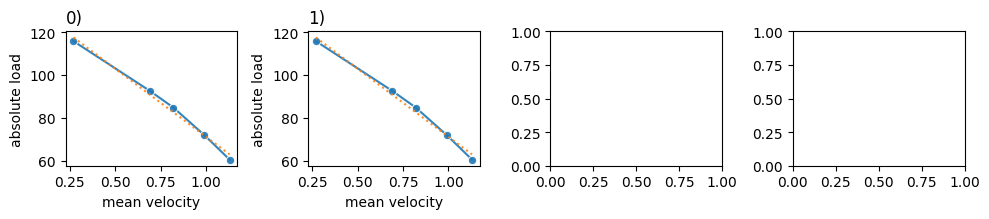

In [1002]:
sample_mean2 = sample_mean.copy()
sample_mean2['100%MV'] = 0.27 # Since this is not available, use same value as from data set
sample_mean2 = pd.concat([sample_mean2, sample_mean2], axis=0)
sample_mean2.index=[0,1]
sns.reset_defaults()
plot_profiles_lr(reshape_group_df_lr(sample_mean2))

In [994]:
sample_mean2

Load50%1RM  Load60%1RM  Load70%1RM  Load80%1RM  50%MV  60%MV  70%MV  80%MV  \
0        60.5        72.0        84.8        92.6   1.13   0.99   0.82   0.69   
1        60.5        72.0        84.8        92.6   1.13   0.99   0.82   0.69   

       slope   intercept  Load-1RM-1  100%MV  
0 -73.325095  144.017524      115.75    0.27  
1 -73.325095  144.017524      115.75    0.27

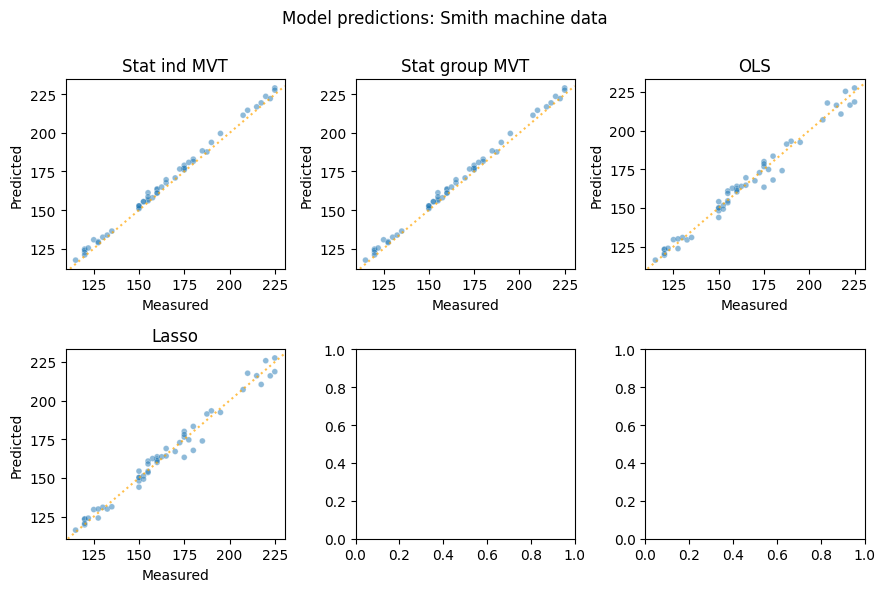

In [814]:
# # Scatter plots for one data set
# import matplotlib.pyplot as plt
# def compare_models(predictions_df, title):
#     predictions = predictions_df.columns[1:].to_list()

#     nrows = round((len(predictions)+2)//3)
#     fig, ax = plt.subplots(ncols=3, nrows=nrows, figsize=(3*3, nrows*3))
#     ax = ax.flatten()
#     for index, model in enumerate(predictions):
#         sns.scatterplot(data=predictions_df, x='Measured', y=model, ax=ax[index],
#             alpha=0.5, size=0.2, legend=False
#         )
#         ax[index].set_ylabel('Predicted')
#         ax[index].axline(xy1=(150, 150), slope=1, alpha=0.7, ls=':', color='orange')
#         ax[index].set_title(model)
#     fig.suptitle(title)
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

# sm_predictions_plot = compare_models(sm_predictions, title='Model predictions: Smith machine data')
# sm_predictions_plot.savefig('../output/figures/sm_predictions_plot.png')

# Neural Network

## `build_nn` function

In [589]:
print(sm_train.shape)
sm_train.head()

(41, 18)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
22  19.0  57.9   174.0        24.0        48.0        72.0        96.0   
31  18.0  60.7   173.0        25.5        51.0        76.5       102.0   
29  23.0  73.4   176.0        32.5        65.0        97.5       130.0   
42  22.0  83.8   184.0        41.5        83.0       124.5       166.0   
43  21.0  72.8   175.0        31.0        62.0        93.0       124.0   

    Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
22       108.0       120.0    1.07   0.89   0.69   0.54   0.42    0.28   
31       115.0       127.5    1.10   0.96   0.76   0.53   0.38    0.28   
29       146.0       162.5    1.09   0.96   0.75   0.52   0.36    0.26   
42       187.0       207.5    1.02   0.85   0.70   0.47   0.36    0.25   
43       139.5       155.0    1.04   0.95   0.76   0.54   0.41    0.27   

       slope  intercept  group MVT  
22 -0.007974   1.270281   0.255577  
31 -0.008256   1.352929   0.255577  
29 -0.006599   1.353419   0.255577  
42 -0.004649   1.235561   0.255577  
43 -0.006323   1.298667   0.255577

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 2)                5         
 tion)                                                           
                                                                 
 dense_67 (Dense)            (None, 10)                30        
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 46
Trainable params: 41
Non-trainable params: 5
_________________________________________________________________
None
2/2 [==============================] - 0s 6ms/step

Neural network evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			32.09		982.96		-950.88
MAE: 			23.84		24.44		-0.59
mean error: 		-21.00		-4.74		-16.26
R^2: 			-0.75		-0.02		-0.73


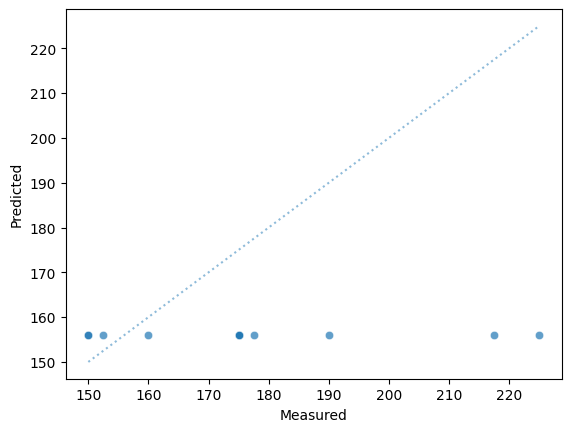

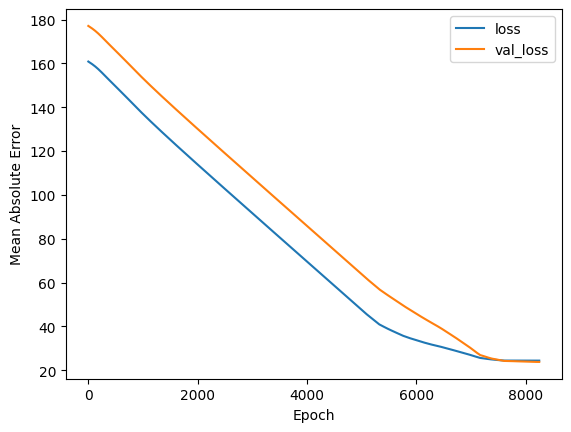

In [583]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt

def build_nn(df_train, df_test, x_columns, epochs=2, normalize=True):
    X_train = df_train[x_columns]
    X_test = df_test[x_columns]
    y_train = df_train['Load-1RM-1']
    y_test = df_test['Load-1RM-1']

    model = Sequential()
    if normalize:
        model.add(Normalization())
    model.add(Dense(10, activation='sigmoid', input_shape=(X_test.shape[1],))) # Outputs to 10 hidden neurons
    model.add(Dense(1))
    model.compile(
        loss='mean_absolute_error',
        optimizer='adam',
        metrics=['mean_absolute_error', 
            # RootMeanSquaredError()
            ]
    )
    history = model.fit(
        X_train,
        y_train, 
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=[EarlyStopping(patience=50)],
        verbose=0
    )
    print(model.summary())
    metrics = model.evaluate(X_test, y_test)
    metrics_train = model.evaluate(X_train, y_train)
    y_pred = model.predict(X_test).flatten()
    y_pred_train = model.predict(X_train).flatten()

    fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name='Neural network')

    # Plot the metrics history
    fig2, ax = plt.subplots(nrows=1 ,ncols=1)
    sns.lineplot(history.history['loss'], label='loss', ax=ax)
    sns.lineplot(history.history['val_loss'], label='val_loss', ax=ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Absolute Error')
    # ax.grid(True)

    return model, y_pred_train, y_pred, history, fig, fig2

model5, y_pred5_train, y_pred5_test, model5_history, eval_fig5_test, model5_history_test = build_nn(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], epochs=10000, normalize=True)
eval_fig5_test.figure.savefig('../output/figures/sm_model5_test.png')
model5_history_test.figure.savefig('../output/figures/sm_model5_history_test.png')

In [584]:
y_pred5_test

array([156.04332, 156.04367, 156.04393, 156.04314, 156.04382, 156.04399,
       156.04399, 156.04378, 156.04391, 156.04337, 156.04315],
      dtype=float32)

# *End of Page*